In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_classification_functions
import custom_models
from custom_classification_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = True

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "FP"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_classification_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_random_fp/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_classification_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_scaffold_fp/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001
batch_size = 1024

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [1, 2, 3]
    param_combinations_fp["fpSize"] = [512, 1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [10]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [11]:
print(len(combinations))

72


run: 0
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60B187C0>, <torch.utils.data.dataset.Subset object at 0x000001BC03530B80>, <torch.utils.data.dataset.Subset object at 0x000001BC03535190>]


[20:52:33] WARNING: not removing hydrogen atom without neighbors
[20:52:33] WARNING: not removing hydrogen atom without neighbors
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 0.2336654658570434 | Validation Loss 0.15003012865781784 | Validation accuracy 0.971875


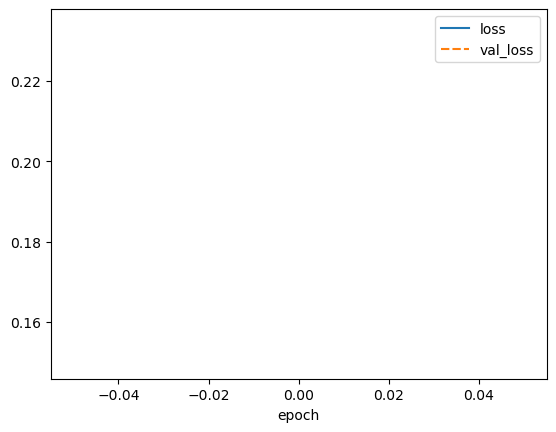

best weights loaded


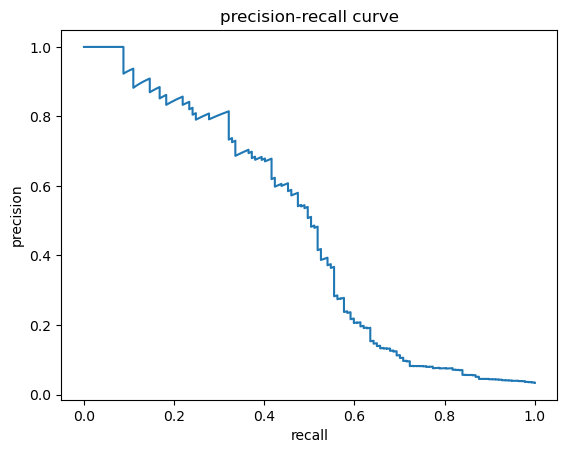

elapsed time: 45.53309941291809
run: 1
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60CB90D0>, <torch.utils.data.dataset.Subset object at 0x000001BD06B07A00>, <torch.utils.data.dataset.Subset object at 0x000001BD06B0E280>]


[20:53:18] WARNING: not removing hydrogen atom without neighbors
[20:53:18] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22023084037231677 | Validation Loss 0.1519971251487732 | Validation accuracy 0.9609592013888889


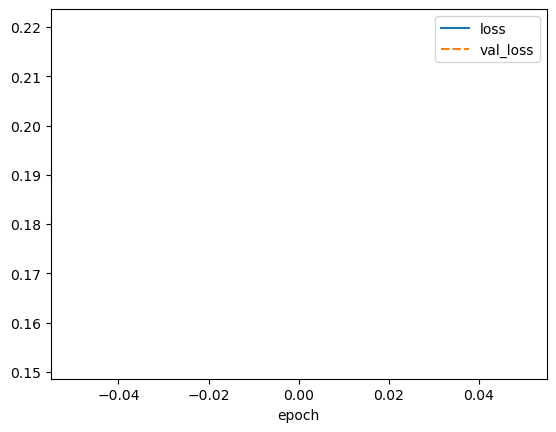

best weights loaded


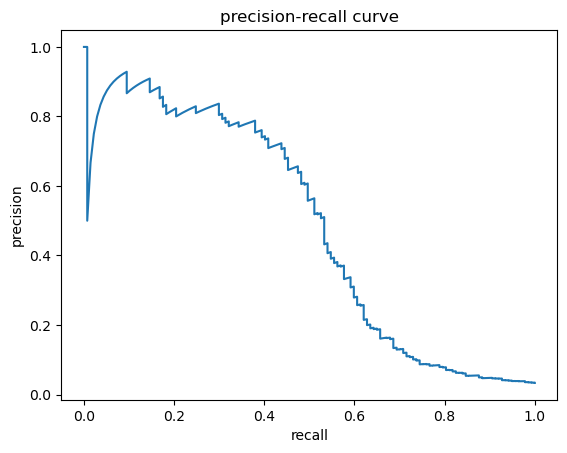

elapsed time: 47.660377979278564
run: 2
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60C26190>, <torch.utils.data.dataset.Subset object at 0x000001BD06AFB5E0>, <torch.utils.data.dataset.Subset object at 0x000001BD06AFBD60>]


[20:54:09] WARNING: not removing hydrogen atom without neighbors
[20:54:09] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18864470900911273 | Validation Loss 0.14386270046234131 | Validation accuracy 0.9609592013888889


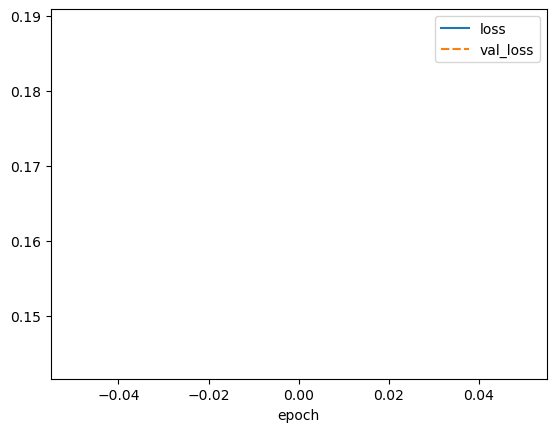

best weights loaded


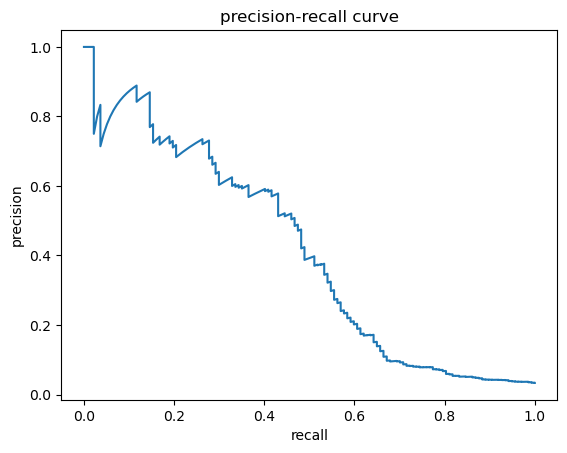

elapsed time: 46.53259825706482
run: 3
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60DA5220>, <torch.utils.data.dataset.Subset object at 0x000001BCF09030A0>, <torch.utils.data.dataset.Subset object at 0x000001BCF0903490>]


[20:54:54] WARNING: not removing hydrogen atom without neighbors
[20:54:54] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18044747005809436 | Validation Loss 0.10082142166793347 | Validation accuracy 0.971875


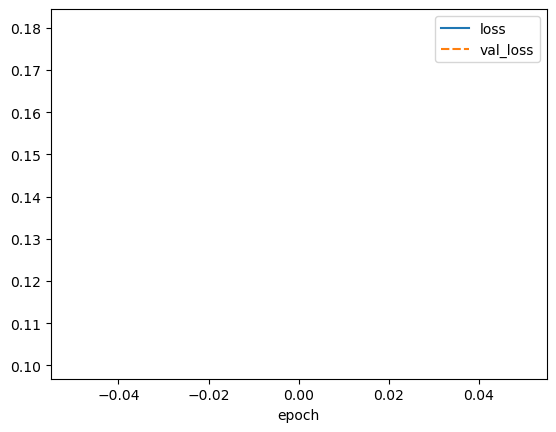

best weights loaded


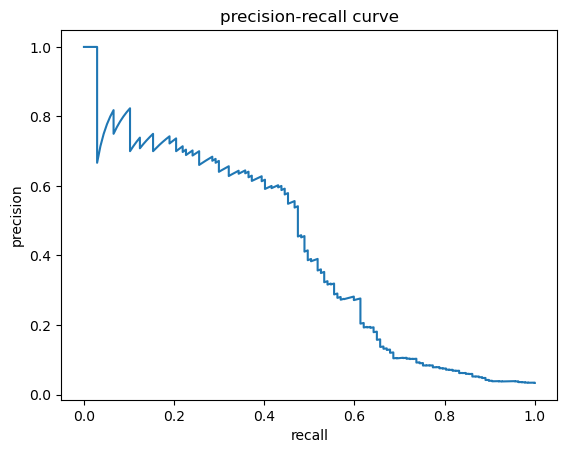

elapsed time: 44.727418184280396
run: 4
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60D8E820>, <torch.utils.data.dataset.Subset object at 0x000001BCF09032B0>, <torch.utils.data.dataset.Subset object at 0x000001BCF0903AF0>]


[20:55:38] WARNING: not removing hydrogen atom without neighbors
[20:55:38] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2040578569426681 | Validation Loss 0.1319270297884941 | Validation accuracy 0.971875


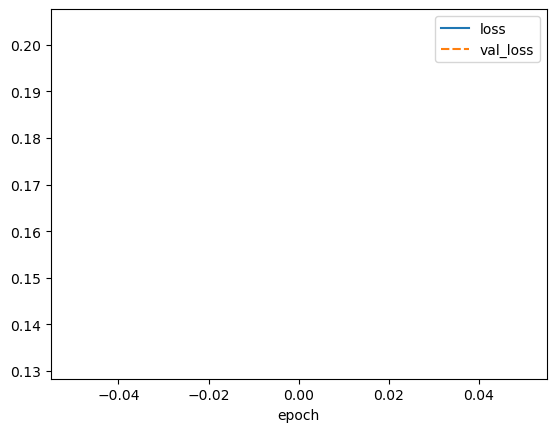

best weights loaded


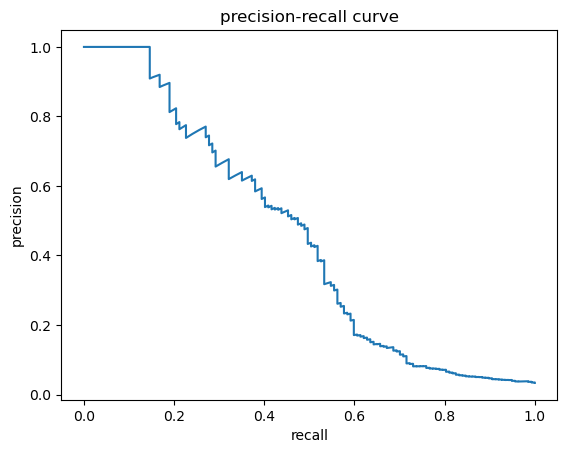

elapsed time: 42.771870374679565
run: 5
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC620A06D0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0460>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D09A0>]


[20:56:21] WARNING: not removing hydrogen atom without neighbors
[20:56:21] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20484217504660288 | Validation Loss 0.11114313863217831 | Validation accuracy 0.971875


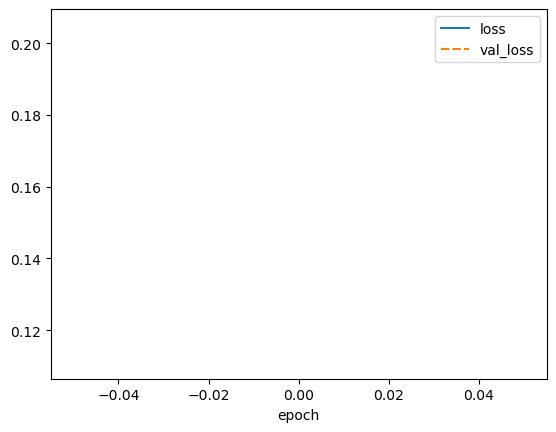

best weights loaded


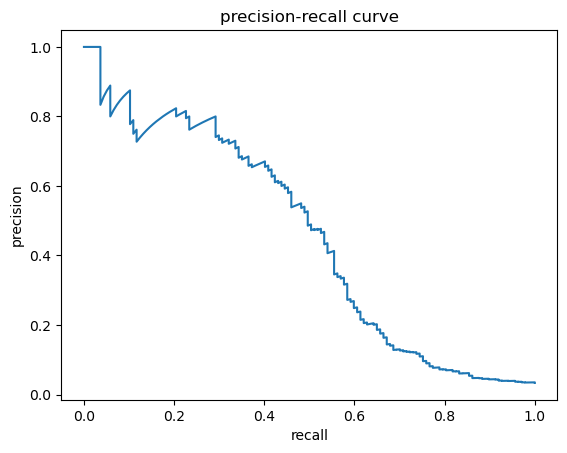

elapsed time: 42.767290115356445
run: 6
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC620B6430>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0FA0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0D00>]


[20:57:04] WARNING: not removing hydrogen atom without neighbors
[20:57:04] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2227939015085047 | Validation Loss 0.14794400632381438 | Validation accuracy 0.971875


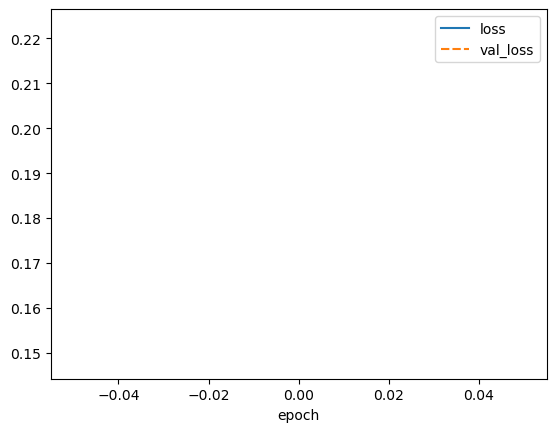

best weights loaded


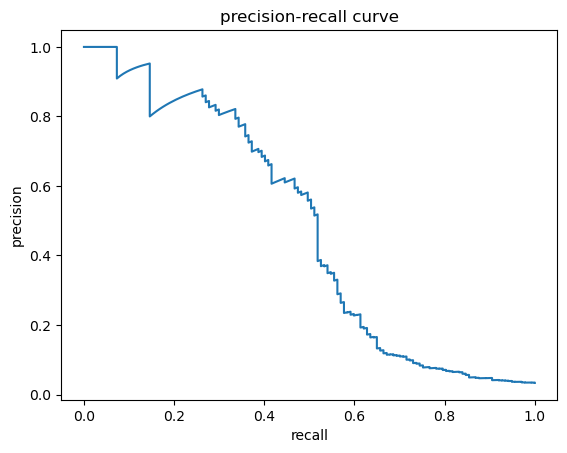

elapsed time: 45.01278376579285
run: 7
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC61FB3BE0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0DF0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0370>]


[20:57:50] WARNING: not removing hydrogen atom without neighbors
[20:57:50] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23405875197865747 | Validation Loss 0.167853444814682 | Validation accuracy 0.9609592013888889


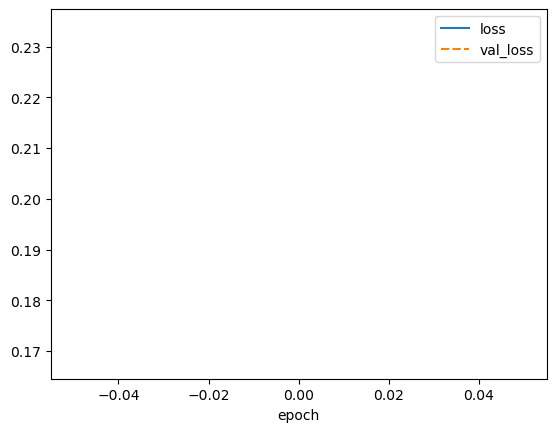

best weights loaded


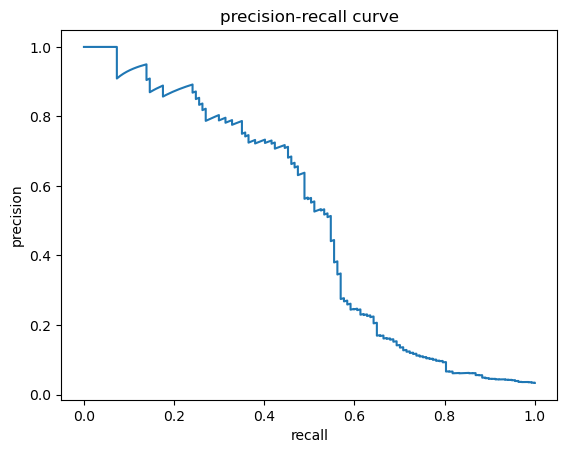

elapsed time: 46.95457172393799
run: 8
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC61F6B250>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0DC0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6E7130>]


[20:58:39] WARNING: not removing hydrogen atom without neighbors
[20:58:39] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22274710373444992 | Validation Loss 0.18118739873170853 | Validation accuracy 0.960763888888889


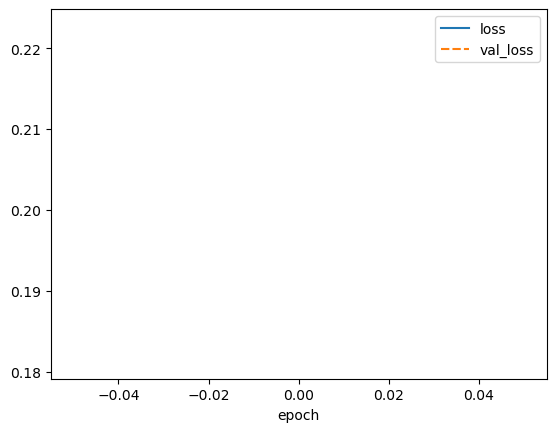

best weights loaded


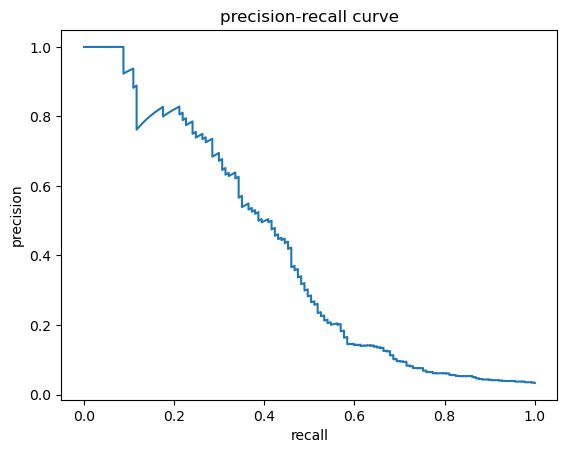

elapsed time: 48.1048104763031
run: 9
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC61F7CA00>, <torch.utils.data.dataset.Subset object at 0x000001BD06B91580>, <torch.utils.data.dataset.Subset object at 0x000001BD06B91A90>]


[20:59:34] WARNING: not removing hydrogen atom without neighbors
[20:59:34] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21845038190032495 | Validation Loss 0.12673880830407142 | Validation accuracy 0.971875


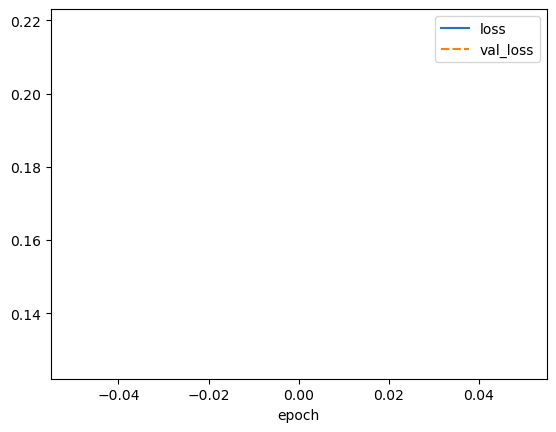

best weights loaded


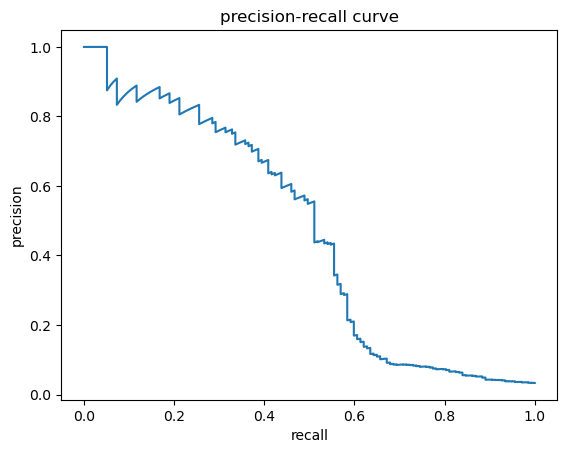

elapsed time: 56.75182509422302
run: 10
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6221D310>, <torch.utils.data.dataset.Subset object at 0x000001BD06A9D760>, <torch.utils.data.dataset.Subset object at 0x000001BD06B8CD90>]


[21:00:25] WARNING: not removing hydrogen atom without neighbors
[21:00:25] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19309625977819617 | Validation Loss 0.2433365985751152 | Validation accuracy 0.9500434027777779


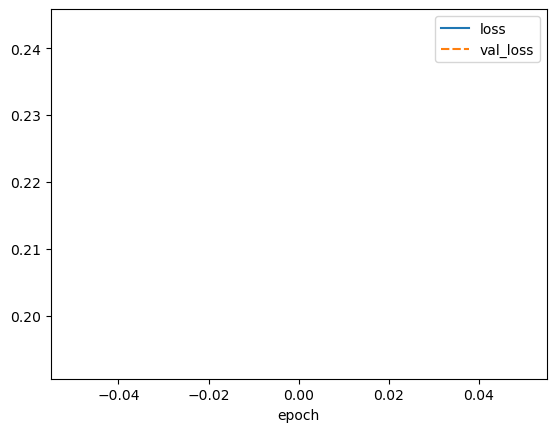

best weights loaded


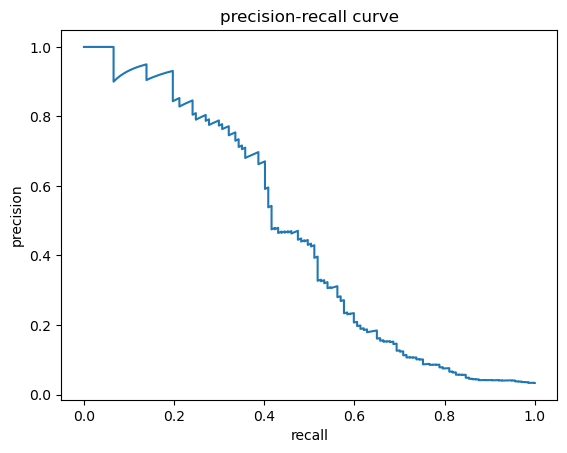

elapsed time: 50.58121037483215
run: 11
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC620DA220>, <torch.utils.data.dataset.Subset object at 0x000001BD0907C340>, <torch.utils.data.dataset.Subset object at 0x000001BD0907C850>]


[21:01:12] WARNING: not removing hydrogen atom without neighbors
[21:01:12] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1934305467840397 | Validation Loss 0.10505695268511772 | Validation accuracy 0.971875


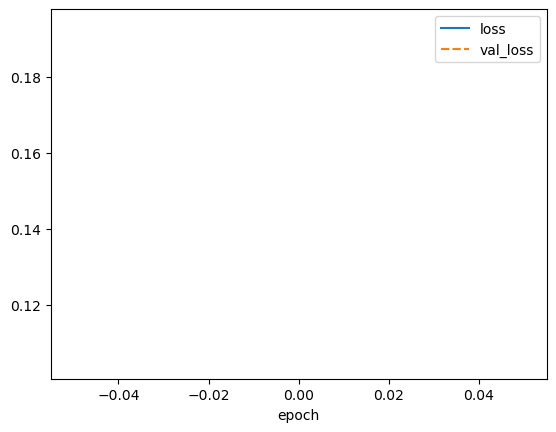

best weights loaded


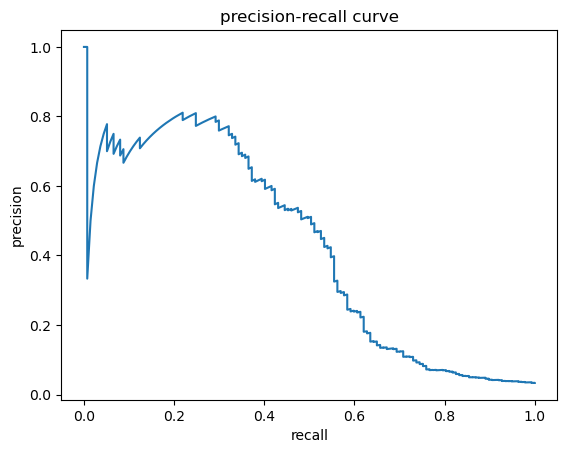

elapsed time: 47.35422992706299
run: 12
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC621F8A60>, <torch.utils.data.dataset.Subset object at 0x000001BD06B87DC0>, <torch.utils.data.dataset.Subset object at 0x000001BD06B877C0>]


[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20326952410466742 | Validation Loss 0.15106962770223617 | Validation accuracy 0.9609592013888889


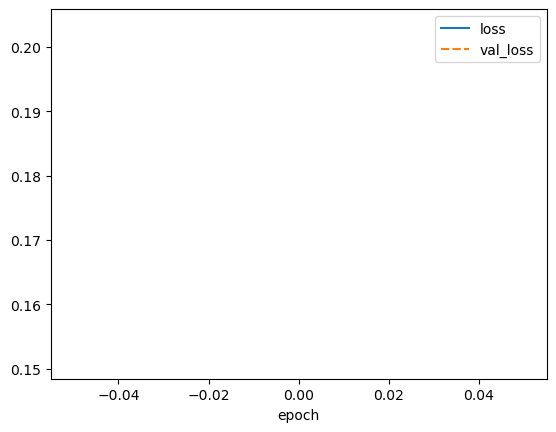

best weights loaded


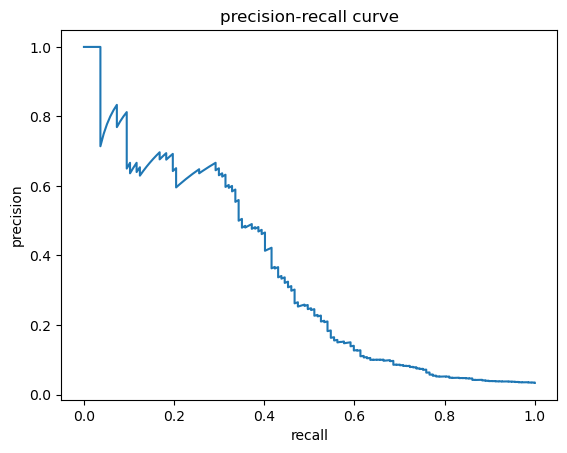

elapsed time: 45.08149790763855
run: 13
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC3CE707C0>, <torch.utils.data.dataset.Subset object at 0x000001BD06BED880>, <torch.utils.data.dataset.Subset object at 0x000001BD06BEDDC0>]


[21:02:45] WARNING: not removing hydrogen atom without neighbors
[21:02:45] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21846953802036517 | Validation Loss 0.20706696957349777 | Validation accuracy 0.9391276041666666


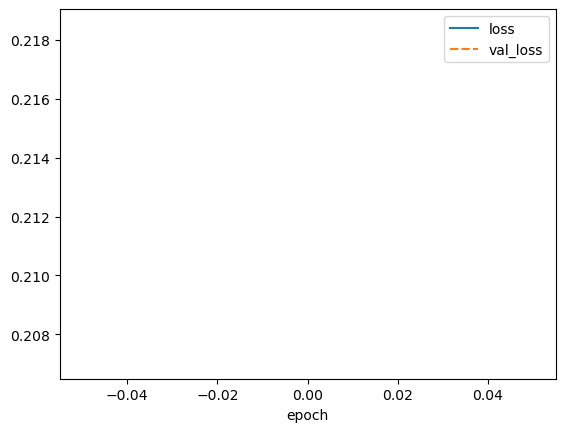

best weights loaded


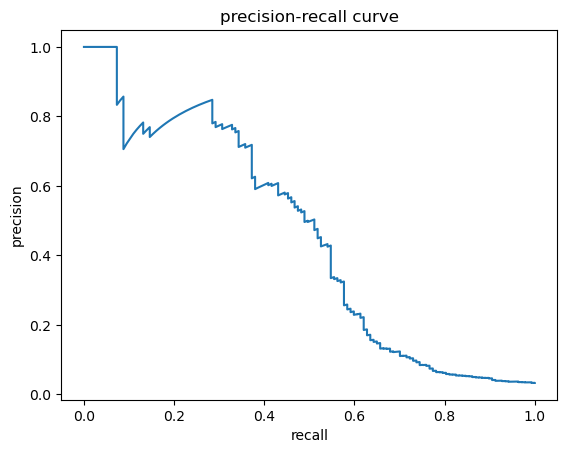

elapsed time: 45.68768048286438
run: 14
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6262DF70>, <torch.utils.data.dataset.Subset object at 0x000001BD06BED5E0>, <torch.utils.data.dataset.Subset object at 0x000001BD06BED3D0>]


[21:03:31] WARNING: not removing hydrogen atom without neighbors
[21:03:31] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22585342463218805 | Validation Loss 0.17440651953220368 | Validation accuracy 0.960763888888889


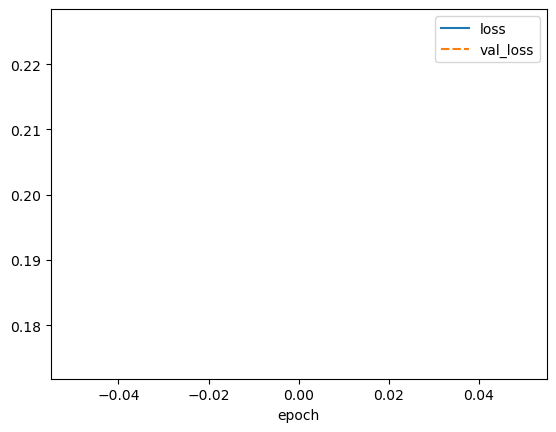

best weights loaded


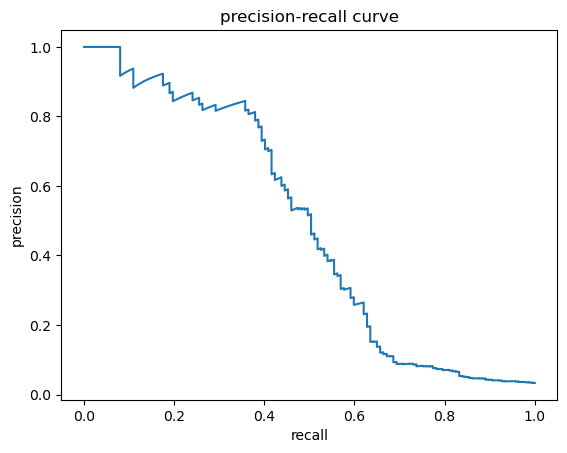

elapsed time: 47.66493463516235
run: 15
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC606871C0>, <torch.utils.data.dataset.Subset object at 0x000001BC035D7460>, <torch.utils.data.dataset.Subset object at 0x000001BC035D75B0>]


[21:04:20] WARNING: not removing hydrogen atom without neighbors
[21:04:20] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23617380451072345 | Validation Loss 0.13102015256881713 | Validation accuracy 0.971875


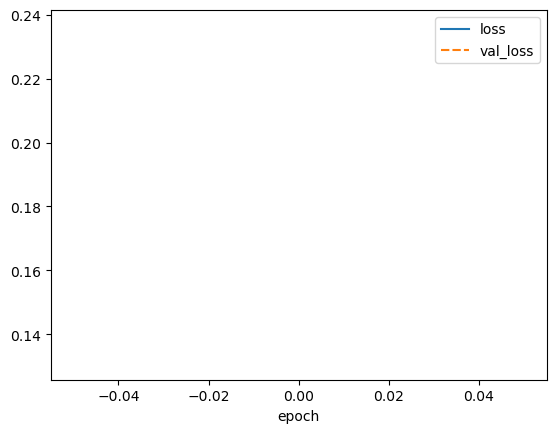

best weights loaded


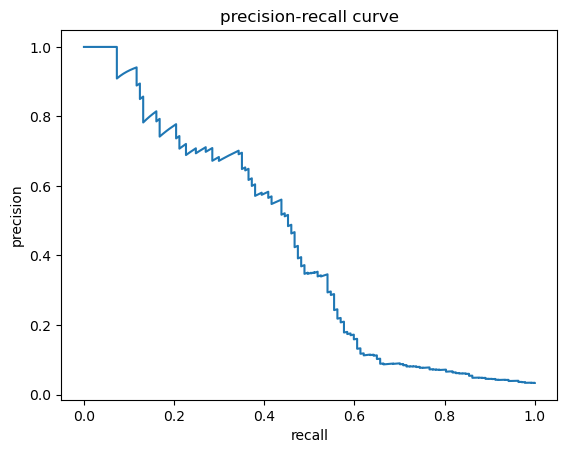

elapsed time: 49.3049259185791
run: 16
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC627B0400>, <torch.utils.data.dataset.Subset object at 0x000001BC73FD7340>, <torch.utils.data.dataset.Subset object at 0x000001BC73FD7880>]


[21:05:12] WARNING: not removing hydrogen atom without neighbors
[21:05:12] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21778883310881528 | Validation Loss 0.17860930860042573 | Validation accuracy 0.9609592013888889


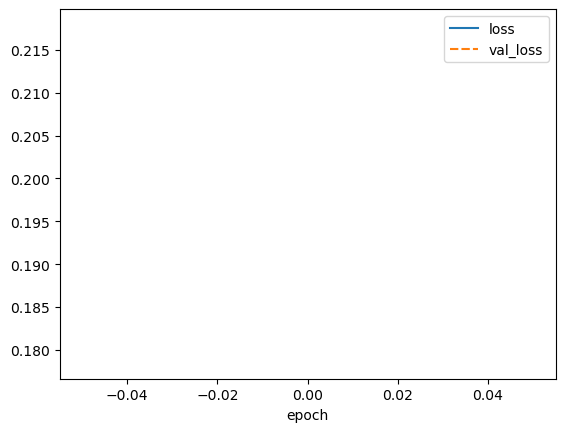

best weights loaded


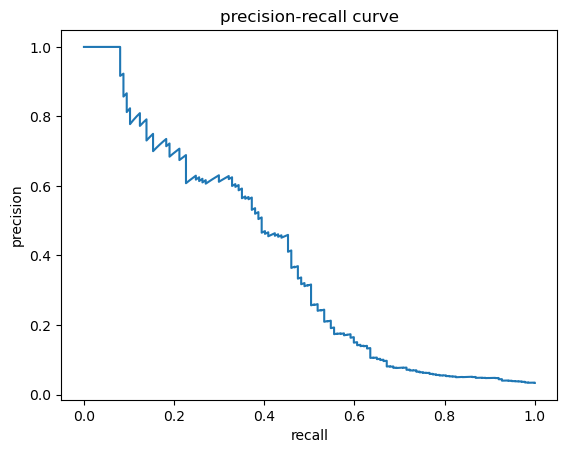

elapsed time: 52.041796922683716
run: 17
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6293F0A0>, <torch.utils.data.dataset.Subset object at 0x000001BD06A9D700>, <torch.utils.data.dataset.Subset object at 0x000001BD06A9D7C0>]


[21:06:04] WARNING: not removing hydrogen atom without neighbors
[21:06:04] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22409926490350204 | Validation Loss 0.1771780639886856 | Validation accuracy 0.9500434027777779


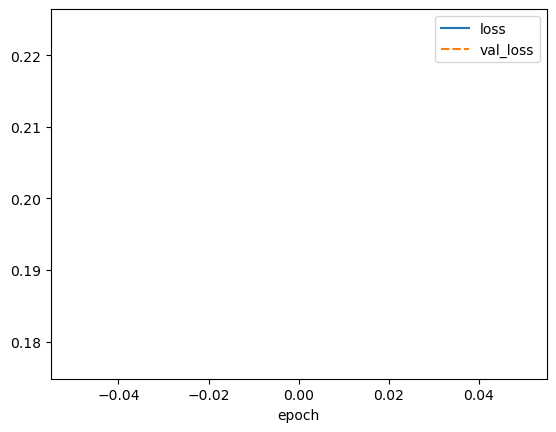

best weights loaded


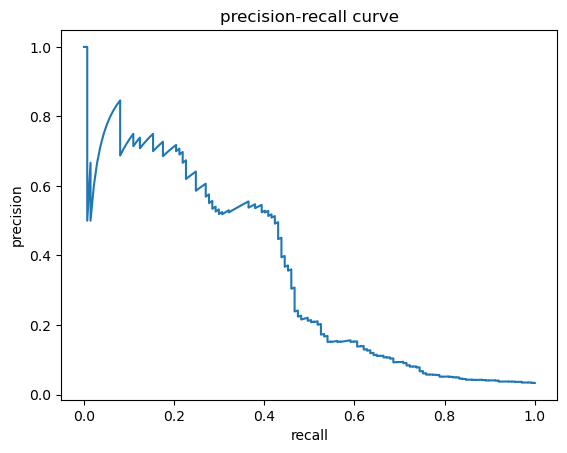

elapsed time: 52.14552164077759
run: 18
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC63C396A0>, <torch.utils.data.dataset.Subset object at 0x000001BD06BCFAC0>, <torch.utils.data.dataset.Subset object at 0x000001BD06BD3040>]


[21:06:55] WARNING: not removing hydrogen atom without neighbors
[21:06:55] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19330147179690274 | Validation Loss 0.11019802317023278 | Validation accuracy 0.971875


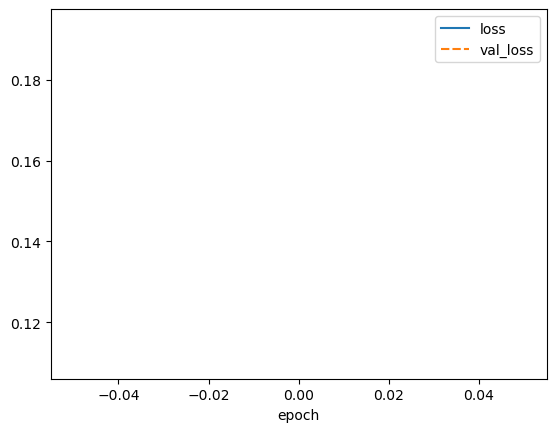

best weights loaded


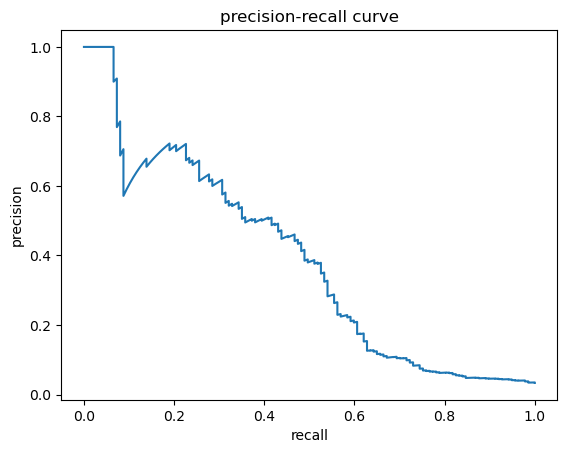

elapsed time: 53.51879668235779
run: 19
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC416146A0>, <torch.utils.data.dataset.Subset object at 0x000001BC62A1B310>, <torch.utils.data.dataset.Subset object at 0x000001BC62A1BD60>]


[21:07:49] WARNING: not removing hydrogen atom without neighbors
[21:07:49] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1990719943335562 | Validation Loss 0.10302698723971844 | Validation accuracy 0.971875


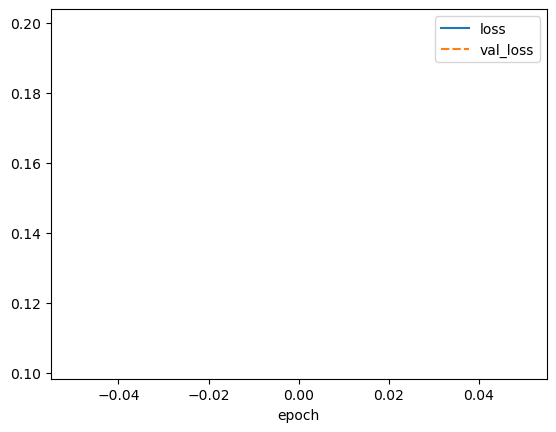

best weights loaded


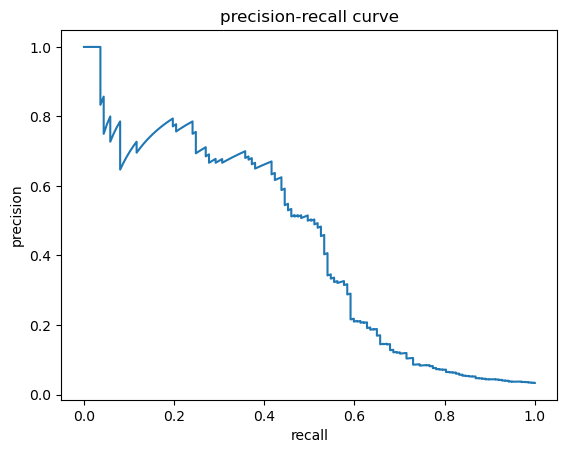

elapsed time: 53.41367793083191
run: 20
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC3CE707C0>, <torch.utils.data.dataset.Subset object at 0x000001BC62C29700>, <torch.utils.data.dataset.Subset object at 0x000001BC62C29280>]


[21:08:43] WARNING: not removing hydrogen atom without neighbors
[21:08:43] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20604608636913876 | Validation Loss 0.1201310247182846 | Validation accuracy 0.971875


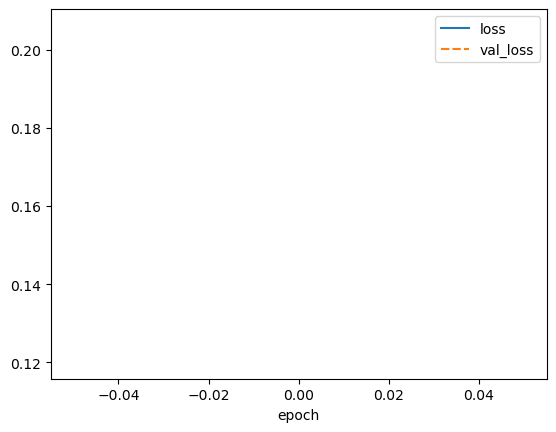

best weights loaded


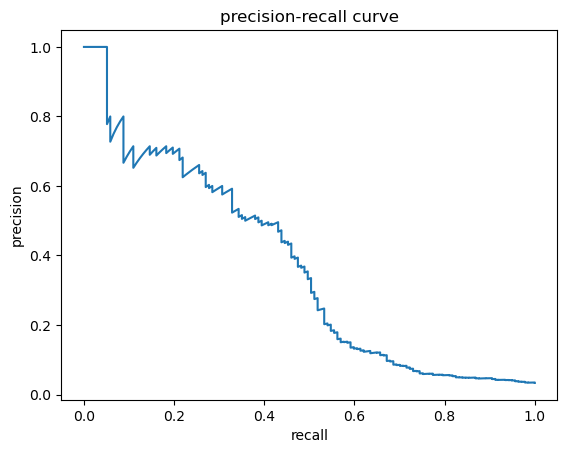

elapsed time: 51.71399402618408
run: 21
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC410D4190>, <torch.utils.data.dataset.Subset object at 0x000001BC03638D00>, <torch.utils.data.dataset.Subset object at 0x000001BC0363F280>]


[21:09:34] WARNING: not removing hydrogen atom without neighbors
[21:09:34] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21738807157133566 | Validation Loss 0.10925257056951523 | Validation accuracy 0.971875


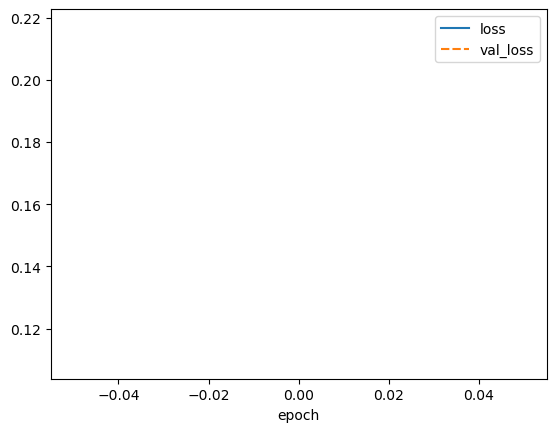

best weights loaded


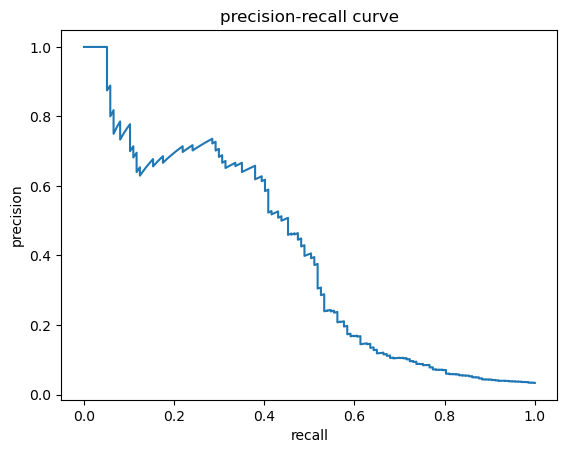

elapsed time: 51.46275043487549
run: 22
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC64287550>, <torch.utils.data.dataset.Subset object at 0x000001BD090B6070>, <torch.utils.data.dataset.Subset object at 0x000001BD090B62E0>]


[21:10:26] WARNING: not removing hydrogen atom without neighbors
[21:10:26] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22360687996401932 | Validation Loss 0.1894802212715149 | Validation accuracy 0.9500434027777779


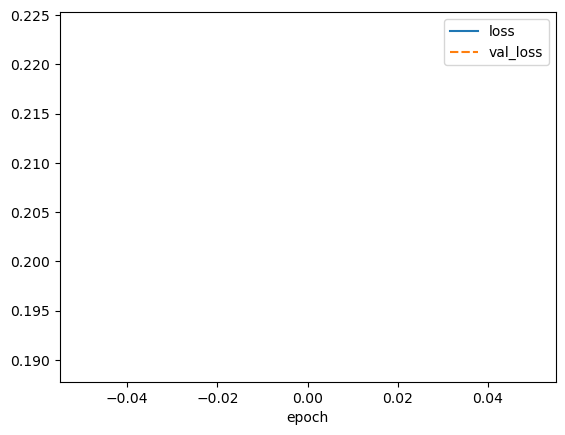

best weights loaded


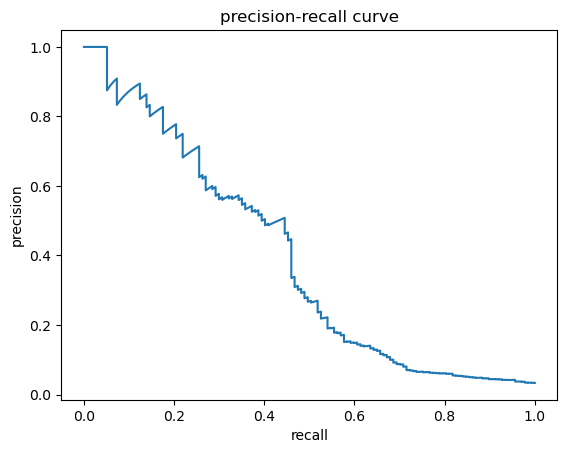

elapsed time: 51.58299231529236
run: 23
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60B10C10>, <torch.utils.data.dataset.Subset object at 0x000001BC03649220>, <torch.utils.data.dataset.Subset object at 0x000001BC03649760>]


[21:11:18] WARNING: not removing hydrogen atom without neighbors
[21:11:18] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23602118681777606 | Validation Loss 0.15676184594631196 | Validation accuracy 0.9609592013888889


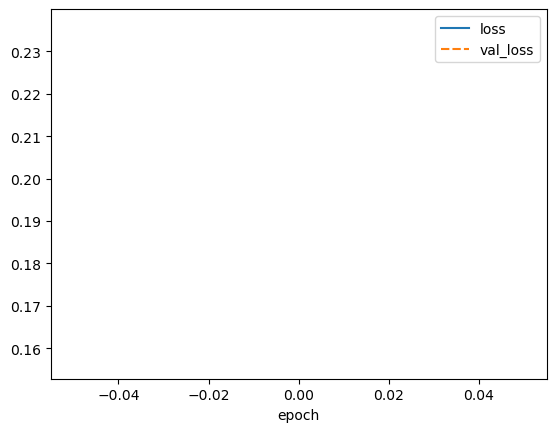

best weights loaded


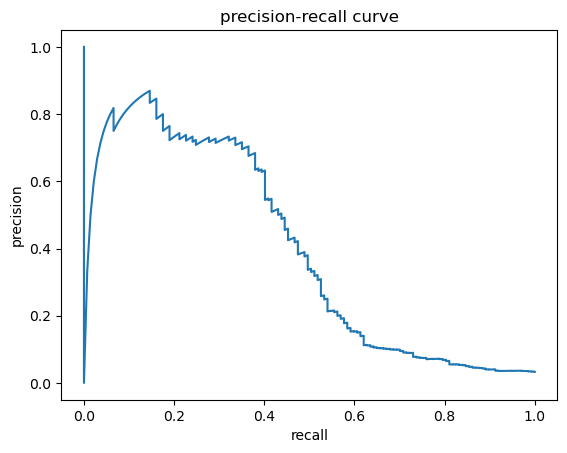

elapsed time: 51.18253016471863
run: 24
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6417B430>, <torch.utils.data.dataset.Subset object at 0x000001BC036494F0>, <torch.utils.data.dataset.Subset object at 0x000001BD090EC190>]


[21:12:05] WARNING: not removing hydrogen atom without neighbors
[21:12:05] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2298643295512055 | Validation Loss 0.1438502177596092 | Validation accuracy 0.971875


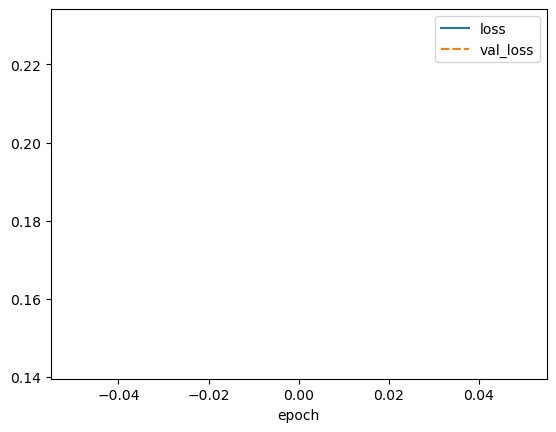

best weights loaded


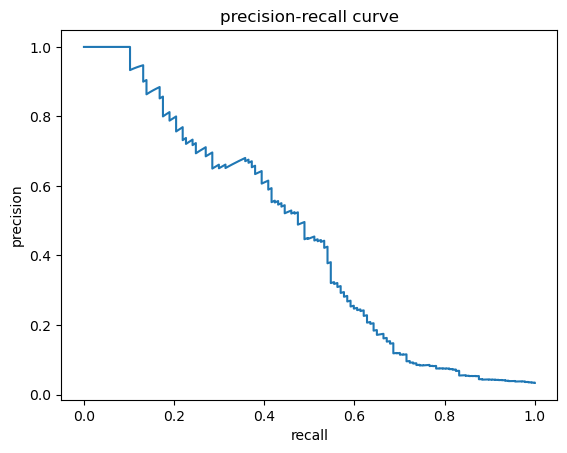

elapsed time: 44.99054741859436
run: 25
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC62B55910>, <torch.utils.data.dataset.Subset object at 0x000001BC0363FF40>, <torch.utils.data.dataset.Subset object at 0x000001BC0363F070>]


[21:12:51] WARNING: not removing hydrogen atom without neighbors
[21:12:51] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21579346557458243 | Validation Loss 0.14169082939624786 | Validation accuracy 0.971875


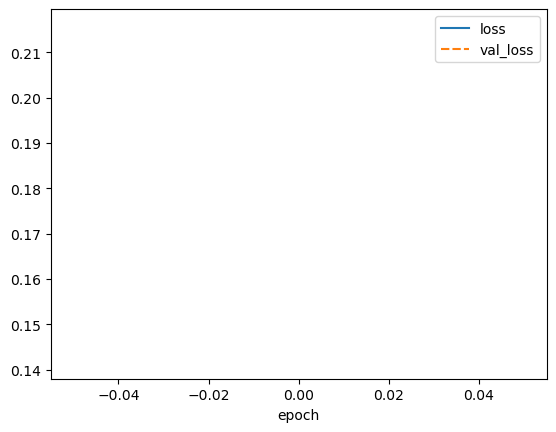

best weights loaded


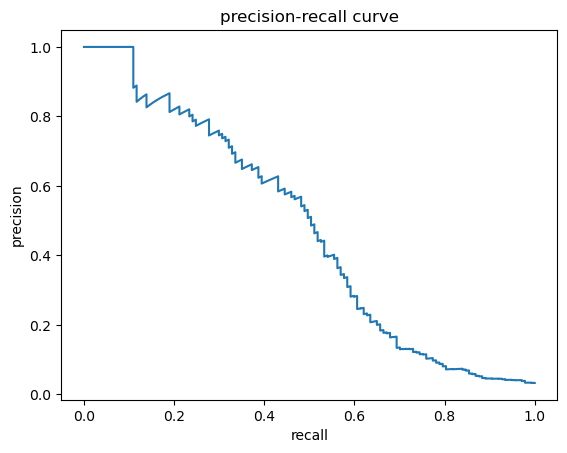

elapsed time: 46.71885848045349
run: 26
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC646BACA0>, <torch.utils.data.dataset.Subset object at 0x000001BC7E2FC700>, <torch.utils.data.dataset.Subset object at 0x000001BC7E2FCE50>]


[21:13:35] WARNING: not removing hydrogen atom without neighbors
[21:13:35] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1956811664682446 | Validation Loss 0.1270299017429352 | Validation accuracy 0.9609592013888889


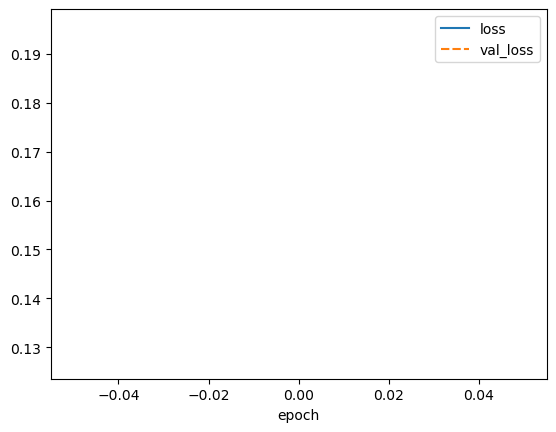

best weights loaded


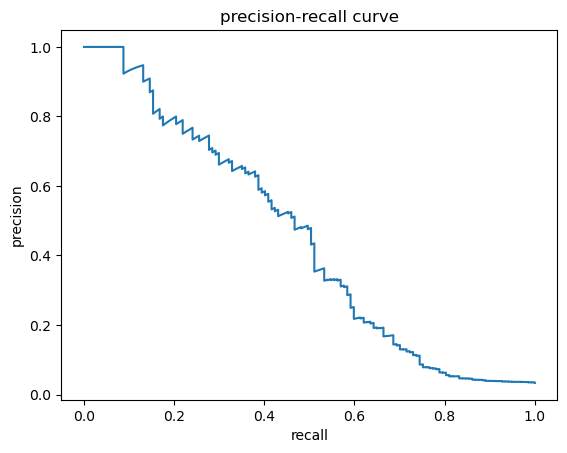

elapsed time: 45.090495109558105
run: 27
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC410D4190>, <torch.utils.data.dataset.Subset object at 0x000001BC31E5CE20>, <torch.utils.data.dataset.Subset object at 0x000001BC31E5C7C0>]


[21:14:20] WARNING: not removing hydrogen atom without neighbors
[21:14:20] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19191532062761713 | Validation Loss 0.14388855695724487 | Validation accuracy 0.9609592013888889


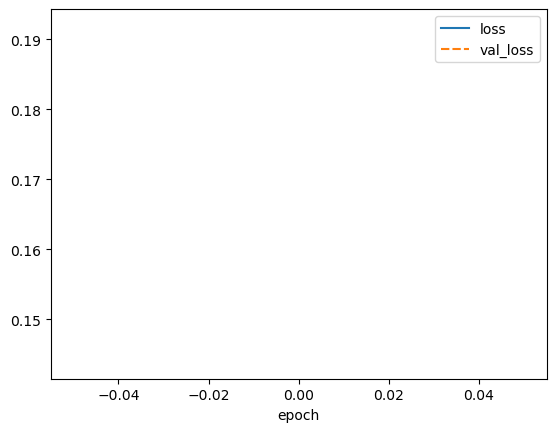

best weights loaded


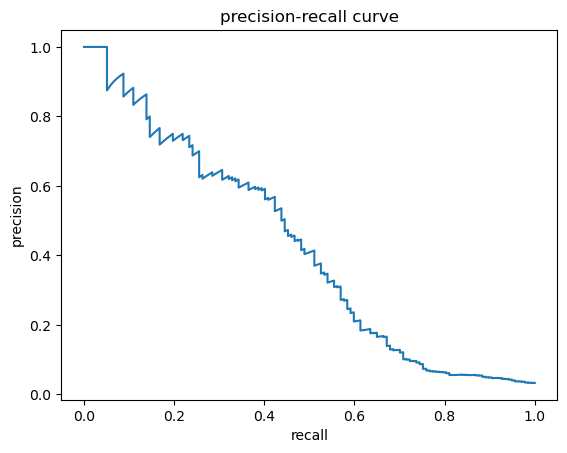

elapsed time: 44.099958419799805
run: 28
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC624CA640>, <torch.utils.data.dataset.Subset object at 0x000001BC62782E20>, <torch.utils.data.dataset.Subset object at 0x000001BC31E5C4F0>]


[21:15:06] WARNING: not removing hydrogen atom without neighbors
[21:15:06] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21432017467238687 | Validation Loss 0.16462813913822175 | Validation accuracy 0.9609592013888889


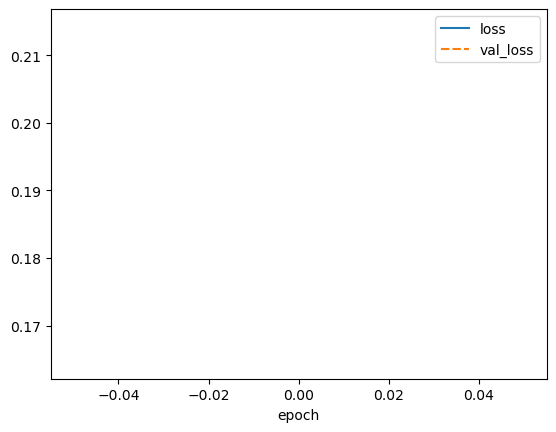

best weights loaded


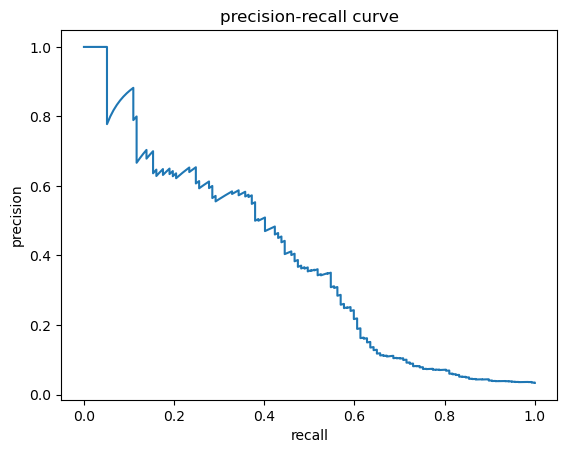

elapsed time: 44.45078110694885
run: 29
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC648039A0>, <torch.utils.data.dataset.Subset object at 0x000001BD090CD0D0>, <torch.utils.data.dataset.Subset object at 0x000001BD090CD5E0>]


[21:15:49] WARNING: not removing hydrogen atom without neighbors
[21:15:49] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20354743708263745 | Validation Loss 0.11236326172947883 | Validation accuracy 0.971875


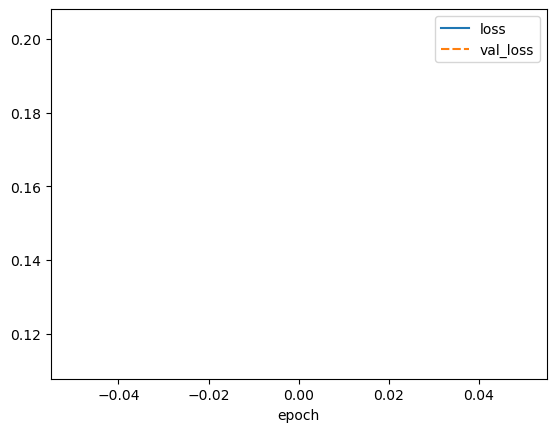

best weights loaded


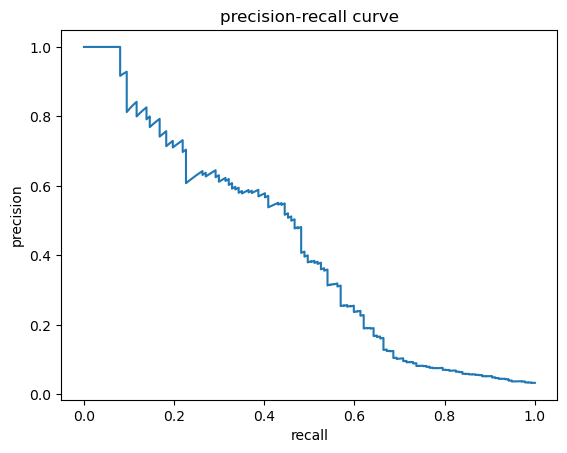

elapsed time: 44.17784404754639
run: 30
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC65C95D90>, <torch.utils.data.dataset.Subset object at 0x000001BD090CD460>, <torch.utils.data.dataset.Subset object at 0x000001BD090CDD60>]


[21:16:35] WARNING: not removing hydrogen atom without neighbors
[21:16:35] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23584587330167944 | Validation Loss 0.15878470093011857 | Validation accuracy 0.971875


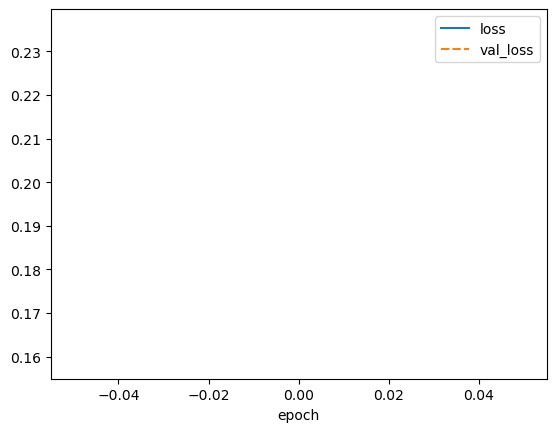

best weights loaded


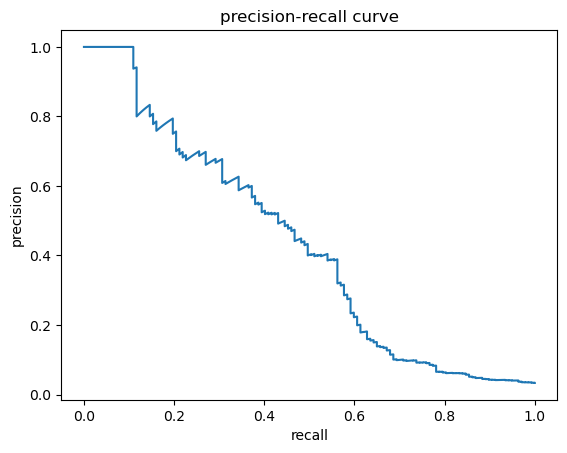

elapsed time: 48.91864609718323
run: 31
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60AF8280>, <torch.utils.data.dataset.Subset object at 0x000001BC0360B610>, <torch.utils.data.dataset.Subset object at 0x000001BC0360B7F0>]


[21:17:23] WARNING: not removing hydrogen atom without neighbors
[21:17:23] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22919119397799173 | Validation Loss 0.2071121394634247 | Validation accuracy 0.9500434027777779


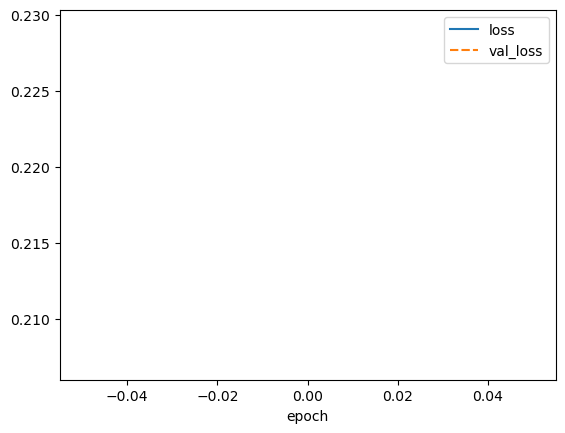

best weights loaded


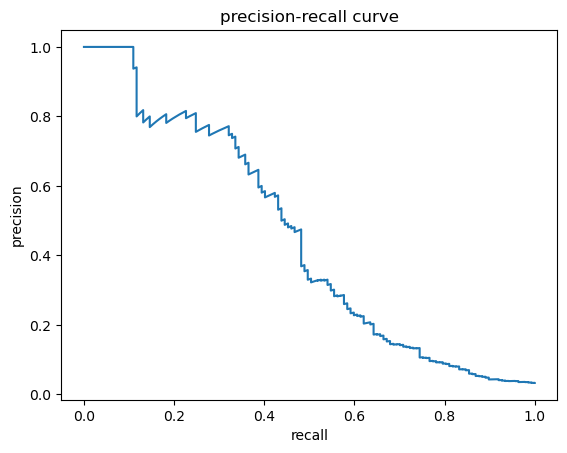

elapsed time: 51.66887617111206
run: 32
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60AF8E20>, <torch.utils.data.dataset.Subset object at 0x000001BC62C29130>, <torch.utils.data.dataset.Subset object at 0x000001BC62C29880>]


[21:18:16] WARNING: not removing hydrogen atom without neighbors
[21:18:16] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21121801255327283 | Validation Loss 0.1343534454703331 | Validation accuracy 0.972265625


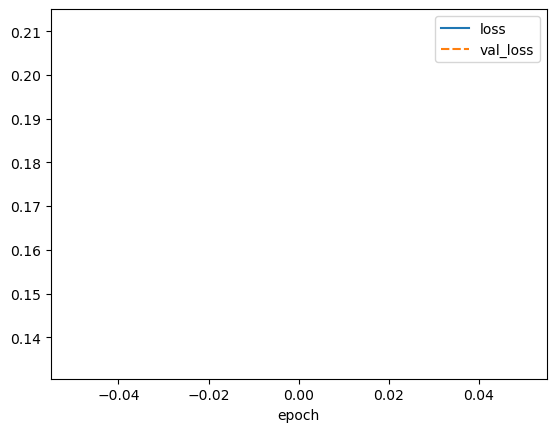

best weights loaded


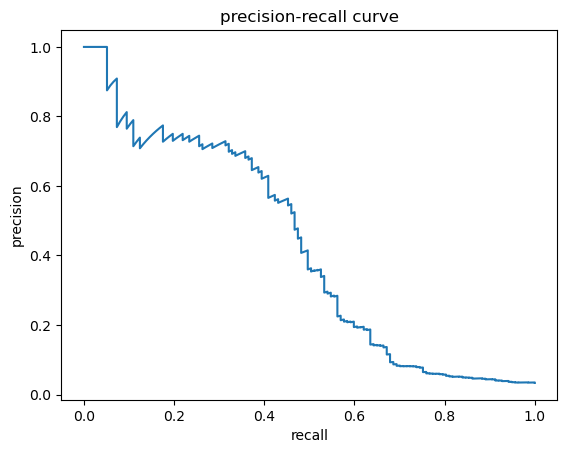

elapsed time: 47.24579977989197
run: 33
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC5DF4B760>, <torch.utils.data.dataset.Subset object at 0x000001BD090D5070>, <torch.utils.data.dataset.Subset object at 0x000001BD090D5520>]


[21:19:03] WARNING: not removing hydrogen atom without neighbors
[21:19:03] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21289081239339078 | Validation Loss 0.20654937624931335 | Validation accuracy 0.9500434027777779


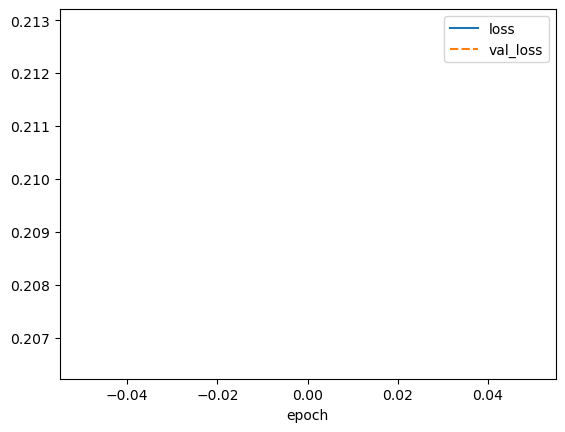

best weights loaded


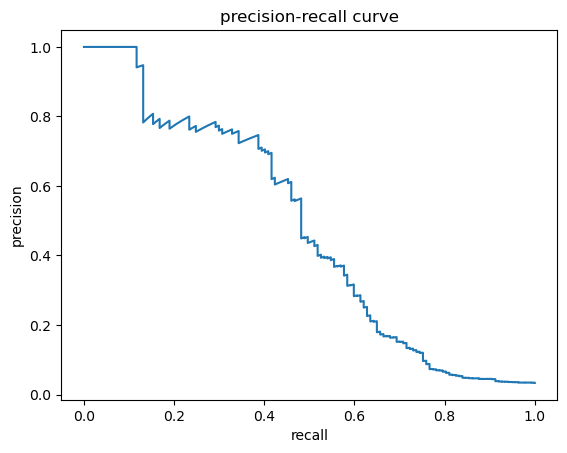

elapsed time: 49.00887179374695
run: 34
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC62B209D0>, <torch.utils.data.dataset.Subset object at 0x000001BCF27F68E0>, <torch.utils.data.dataset.Subset object at 0x000001BD090B6F40>]


[21:19:53] WARNING: not removing hydrogen atom without neighbors
[21:19:53] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18946284078287357 | Validation Loss 0.12256868481636048 | Validation accuracy 0.9609592013888889


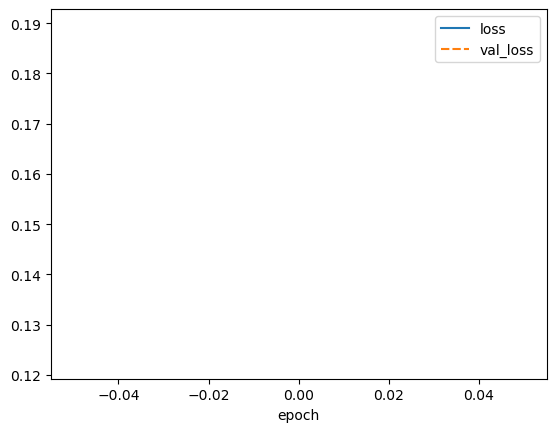

best weights loaded


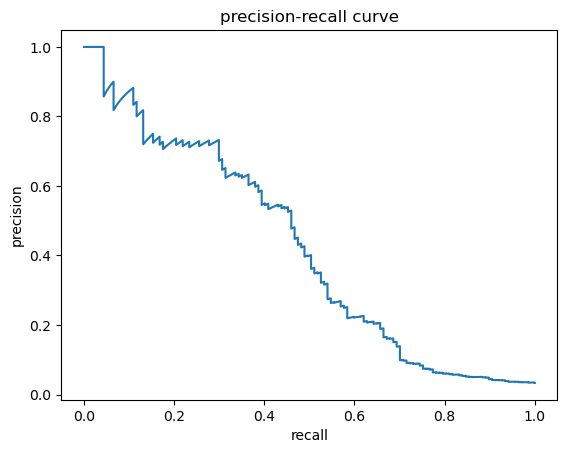

elapsed time: 48.29697299003601
run: 35
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60AF8E20>, <torch.utils.data.dataset.Subset object at 0x000001BC035F8C10>, <torch.utils.data.dataset.Subset object at 0x000001BC03612160>]


[21:20:40] WARNING: not removing hydrogen atom without neighbors
[21:20:40] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18127830676508672 | Validation Loss 0.11897176206111908 | Validation accuracy 0.9609592013888889


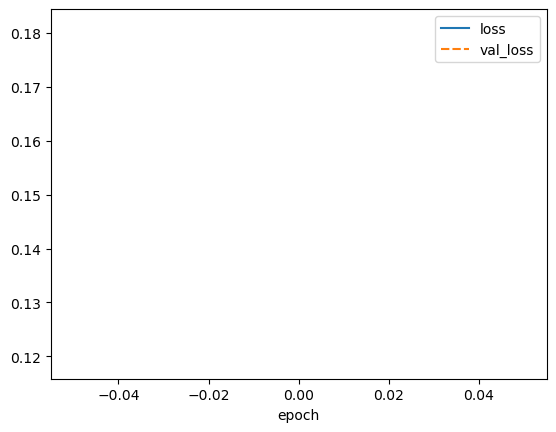

best weights loaded


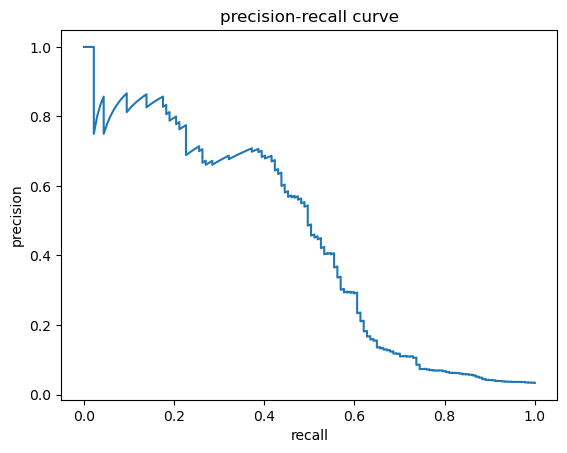

elapsed time: 47.99609708786011
run: 36
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60AF8370>, <torch.utils.data.dataset.Subset object at 0x000001BC03612460>, <torch.utils.data.dataset.Subset object at 0x000001BC036125E0>]


[21:21:29] WARNING: not removing hydrogen atom without neighbors
[21:21:29] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19994370300661435 | Validation Loss 0.1306343361735344 | Validation accuracy 0.9609592013888889


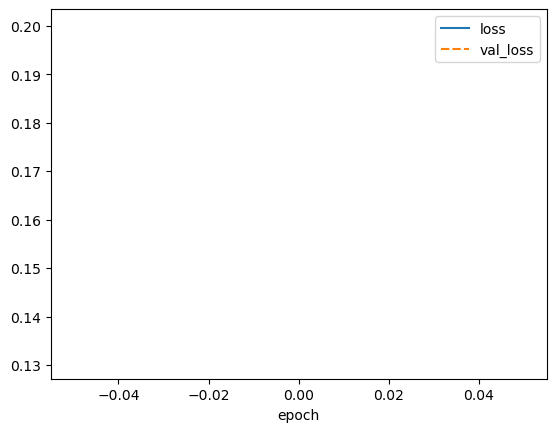

best weights loaded


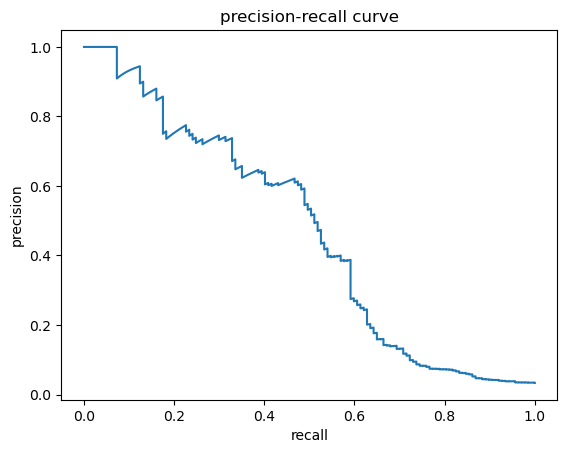

elapsed time: 47.11721086502075
run: 37
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC67668310>, <torch.utils.data.dataset.Subset object at 0x000001BC03612C10>, <torch.utils.data.dataset.Subset object at 0x000001BC03613070>]


[21:22:15] WARNING: not removing hydrogen atom without neighbors
[21:22:15] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20474912056868727 | Validation Loss 0.14109922647476197 | Validation accuracy 0.9609592013888889


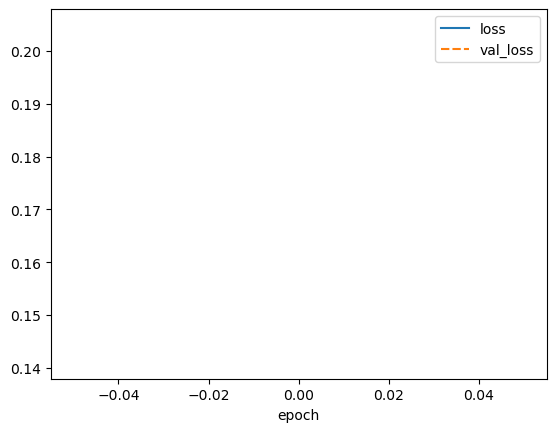

best weights loaded


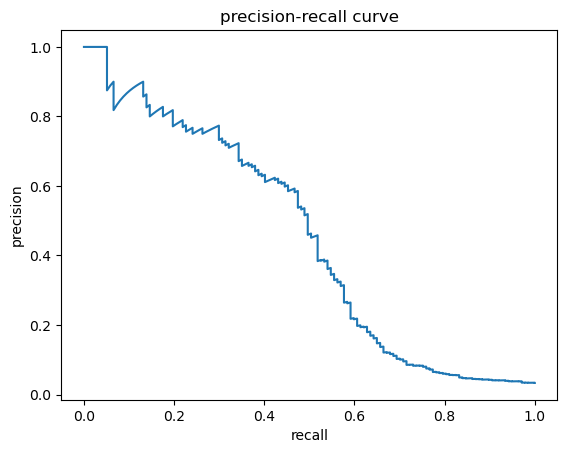

elapsed time: 45.592196226119995
run: 38
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC66619C40>, <torch.utils.data.dataset.Subset object at 0x000001BC03612580>, <torch.utils.data.dataset.Subset object at 0x000001BC67668E50>]


[21:23:02] WARNING: not removing hydrogen atom without neighbors
[21:23:02] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23048075627196918 | Validation Loss 0.229647496342659 | Validation accuracy 0.9391276041666666


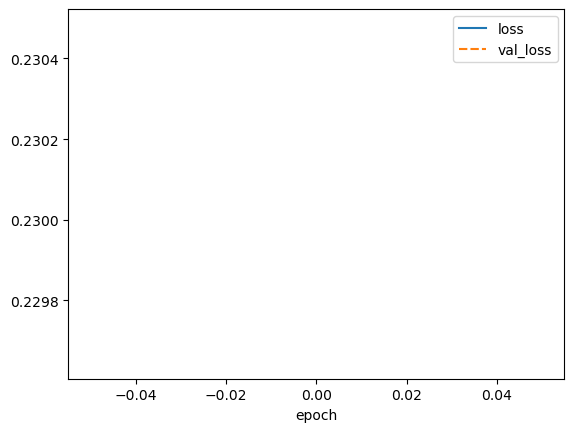

best weights loaded


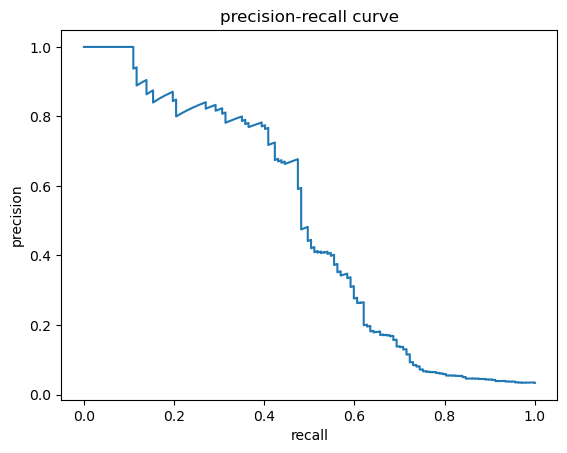

elapsed time: 49.077816009521484
run: 39
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC3CE707C0>, <torch.utils.data.dataset.Subset object at 0x000001BC03612C40>, <torch.utils.data.dataset.Subset object at 0x000001BC03612910>]


[21:23:51] WARNING: not removing hydrogen atom without neighbors
[21:23:51] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22382891629681442 | Validation Loss 0.1598740339279175 | Validation accuracy 0.9609592013888889


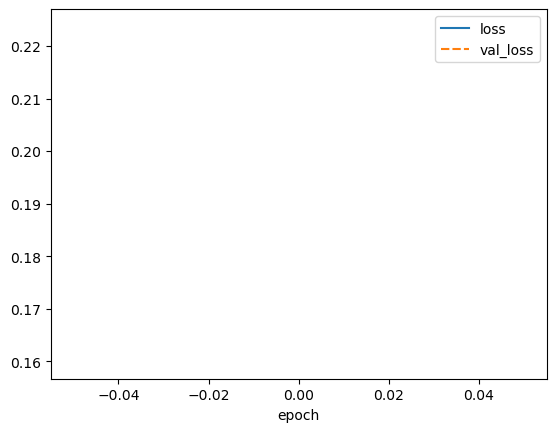

best weights loaded


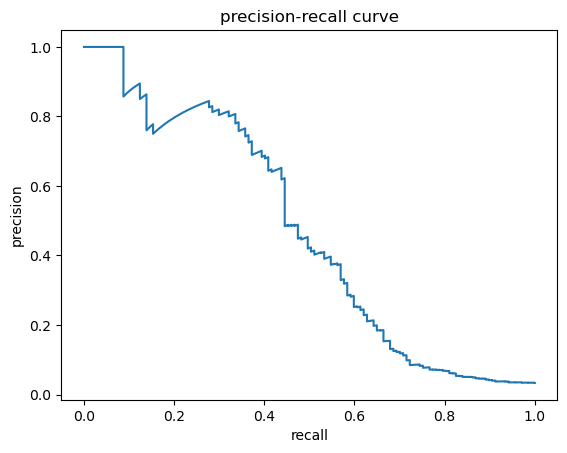

elapsed time: 50.99218416213989
run: 40
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC67722A00>, <torch.utils.data.dataset.Subset object at 0x000001BCFE722610>, <torch.utils.data.dataset.Subset object at 0x000001BCFE722B50>]


[21:24:44] WARNING: not removing hydrogen atom without neighbors
[21:24:44] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21405118523222028 | Validation Loss 0.13955471217632293 | Validation accuracy 0.9619357638888889


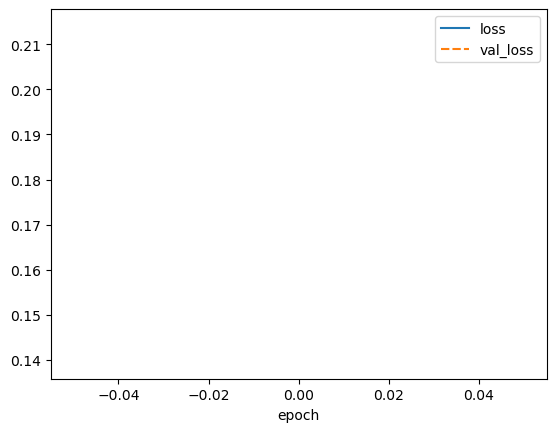

best weights loaded


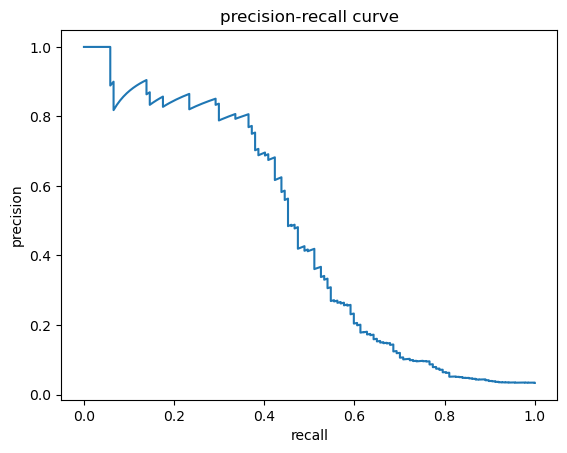

elapsed time: 52.5151207447052
run: 41
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60687370>, <torch.utils.data.dataset.Subset object at 0x000001BD0912E0A0>, <torch.utils.data.dataset.Subset object at 0x000001BD0912E5E0>]


[21:25:37] WARNING: not removing hydrogen atom without neighbors
[21:25:37] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20593010972846637 | Validation Loss 0.12430440336465835 | Validation accuracy 0.97265625


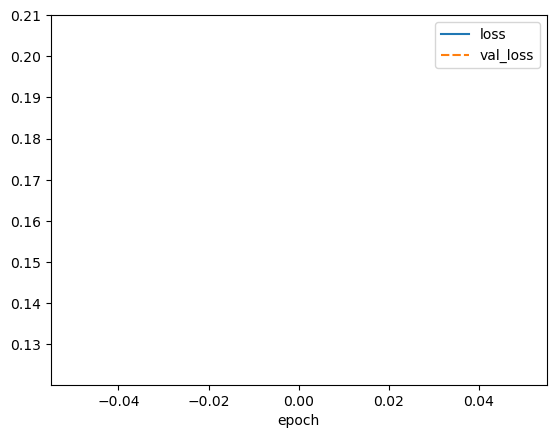

best weights loaded


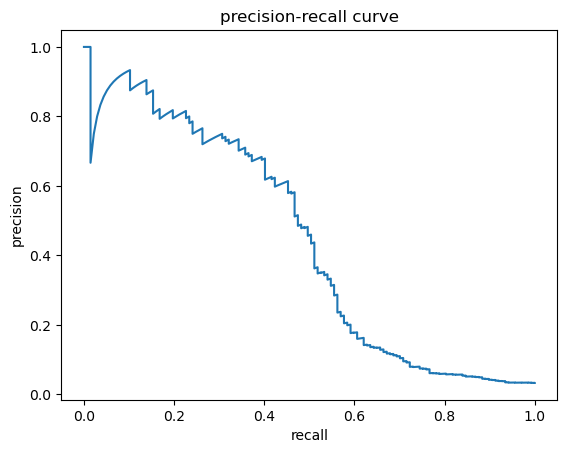

elapsed time: 52.39541959762573
run: 42
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC5DF4B760>, <torch.utils.data.dataset.Subset object at 0x000001BD06B3A370>, <torch.utils.data.dataset.Subset object at 0x000001BD06B3A880>]


[21:26:29] WARNING: not removing hydrogen atom without neighbors
[21:26:29] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1945054583025701 | Validation Loss 0.10895707458257675 | Validation accuracy 0.971875


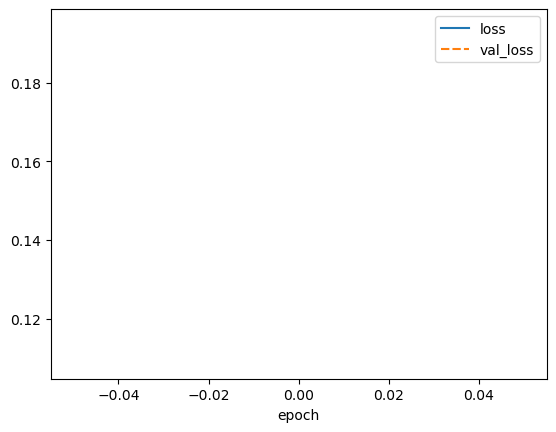

best weights loaded


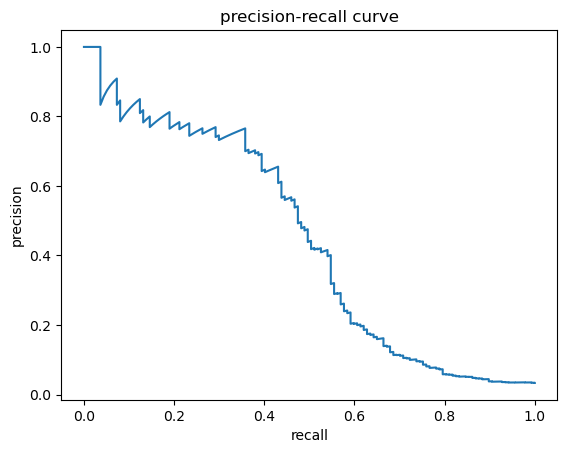

elapsed time: 54.19064402580261
run: 43
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC678D8BB0>, <torch.utils.data.dataset.Subset object at 0x000001BD06B4C940>, <torch.utils.data.dataset.Subset object at 0x000001BD06B4CE80>]


[21:27:24] WARNING: not removing hydrogen atom without neighbors
[21:27:24] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19862846872120193 | Validation Loss 0.10079237967729568 | Validation accuracy 0.971875


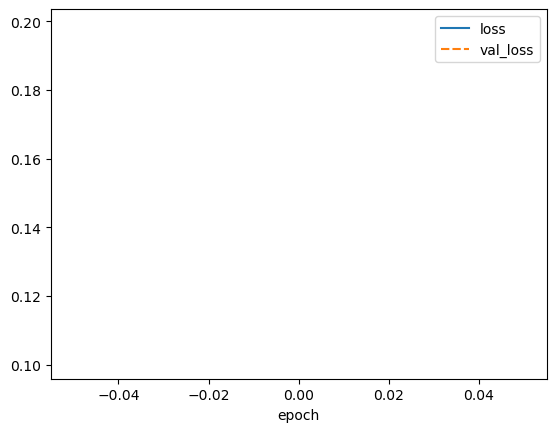

best weights loaded


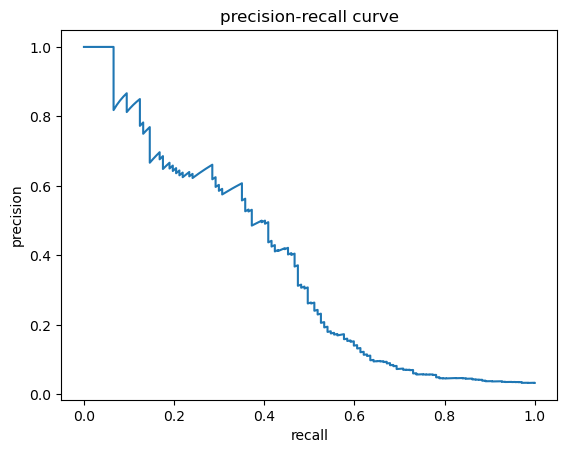

elapsed time: 53.843623876571655
run: 44
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC679D84F0>, <torch.utils.data.dataset.Subset object at 0x000001BC63F3C370>, <torch.utils.data.dataset.Subset object at 0x000001BC63F3CD90>]


[21:28:19] WARNING: not removing hydrogen atom without neighbors
[21:28:19] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2025027351849007 | Validation Loss 0.11968635842204094 | Validation accuracy 0.971875


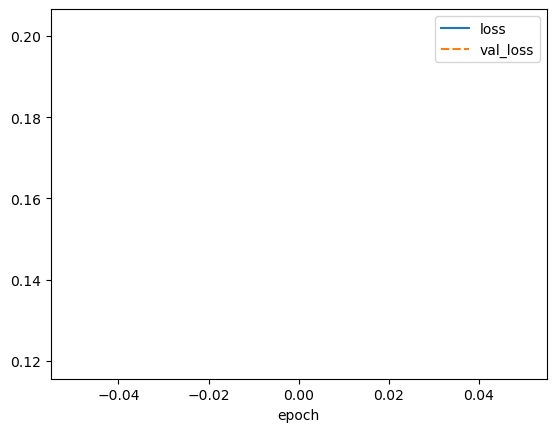

best weights loaded


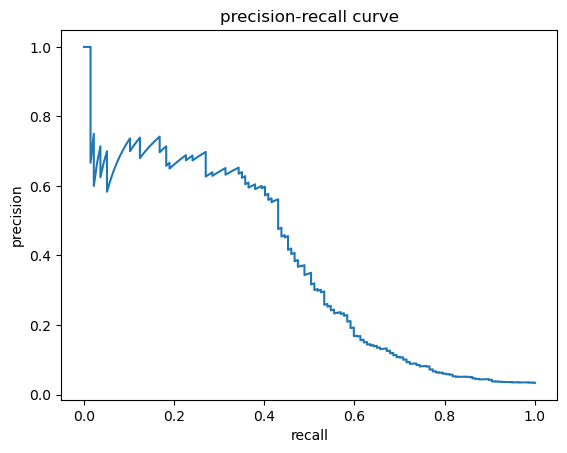

elapsed time: 52.4555139541626
run: 45
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6594B7F0>, <torch.utils.data.dataset.Subset object at 0x000001BD06B37790>, <torch.utils.data.dataset.Subset object at 0x000001BD06B37CA0>]


[21:29:11] WARNING: not removing hydrogen atom without neighbors
[21:29:11] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20530678151231824 | Validation Loss 0.18612428307533263 | Validation accuracy 0.9500434027777779


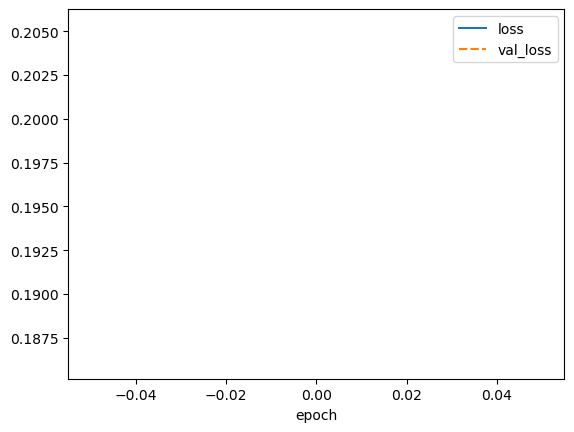

best weights loaded


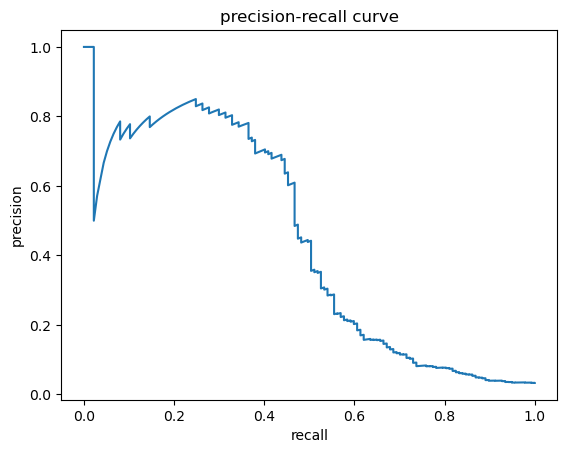

elapsed time: 51.63321042060852
run: 46
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6272BDF0>, <torch.utils.data.dataset.Subset object at 0x000001BCF27F6DF0>, <torch.utils.data.dataset.Subset object at 0x000001BCF27F6FD0>]


[21:30:03] WARNING: not removing hydrogen atom without neighbors
[21:30:03] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21577191465731824 | Validation Loss 0.12833290547132492 | Validation accuracy 0.9724609375


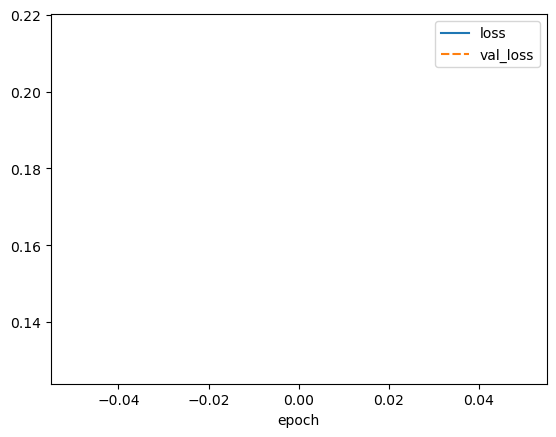

best weights loaded


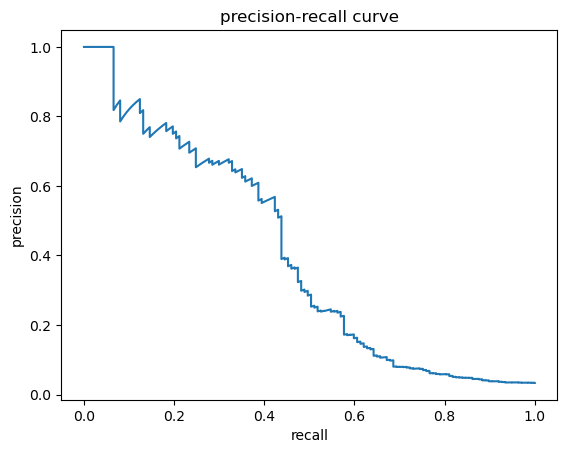

elapsed time: 51.92417907714844
run: 47
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC69253760>, <torch.utils.data.dataset.Subset object at 0x000001BD0913D4F0>, <torch.utils.data.dataset.Subset object at 0x000001BD0913DD90>]


[21:30:55] WARNING: not removing hydrogen atom without neighbors
[21:30:55] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22205979489918912 | Validation Loss 0.12411984726786614 | Validation accuracy 0.971875


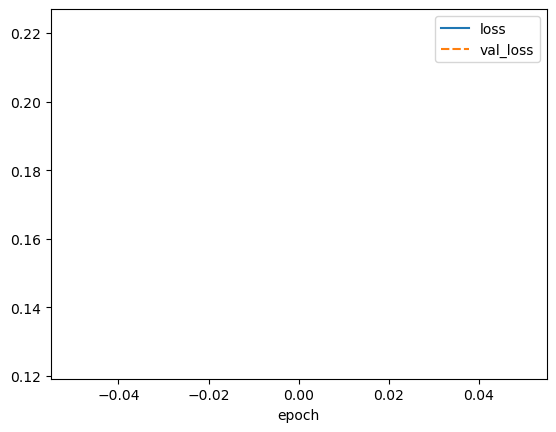

best weights loaded


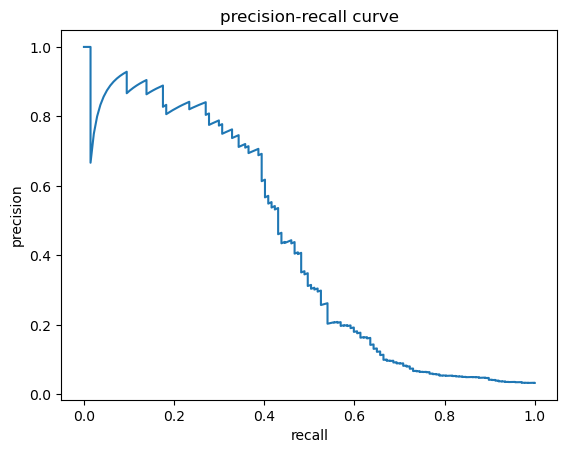

elapsed time: 53.72970914840698
run: 48
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC69200100>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0E80>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6D0F70>]


[21:31:44] WARNING: not removing hydrogen atom without neighbors
[21:31:44] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22879917693860602 | Validation Loss 0.15804202556610109 | Validation accuracy 0.9609592013888889


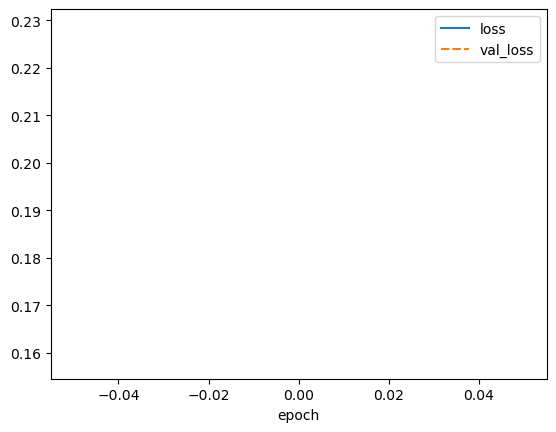

best weights loaded


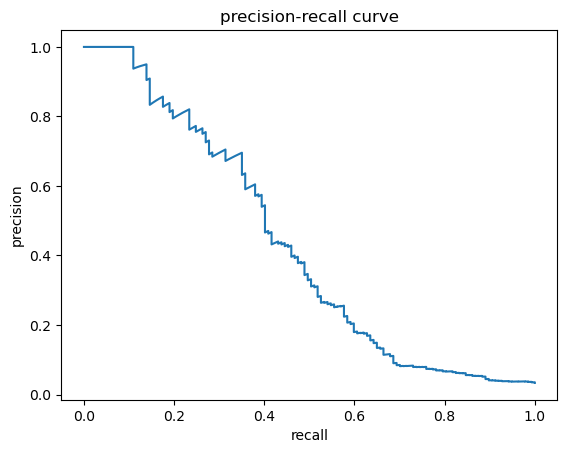

elapsed time: 46.443832874298096
run: 49
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC41614DF0>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6B7040>, <torch.utils.data.dataset.Subset object at 0x000001BCEF6B7400>]


[21:32:31] WARNING: not removing hydrogen atom without neighbors
[21:32:31] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2120470375274167 | Validation Loss 0.17988819777965545 | Validation accuracy 0.9609592013888889


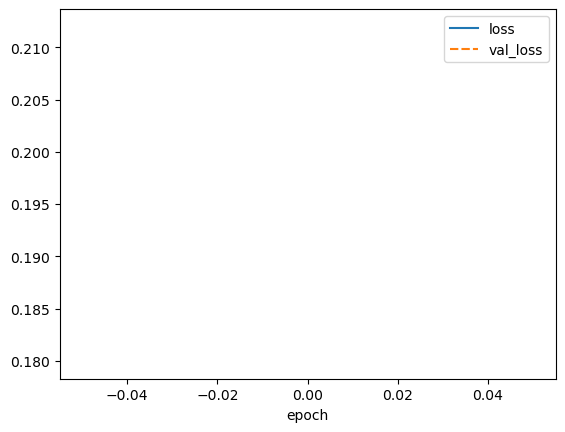

best weights loaded


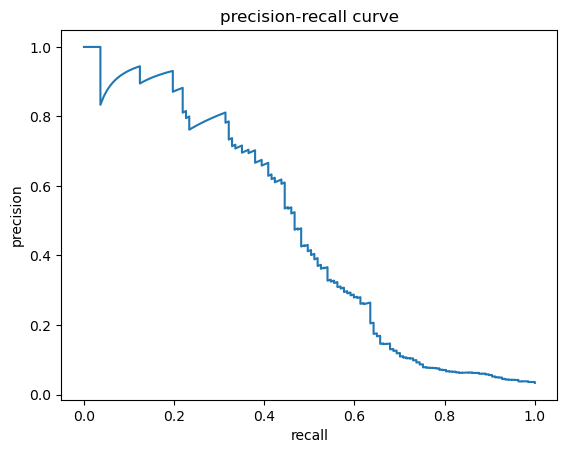

elapsed time: 48.39918065071106
run: 50
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6767D580>, <torch.utils.data.dataset.Subset object at 0x000001BD091367C0>, <torch.utils.data.dataset.Subset object at 0x000001BD091366D0>]


[21:33:20] WARNING: not removing hydrogen atom without neighbors
[21:33:20] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19934284054871762 | Validation Loss 0.1562630921602249 | Validation accuracy 0.9500434027777779


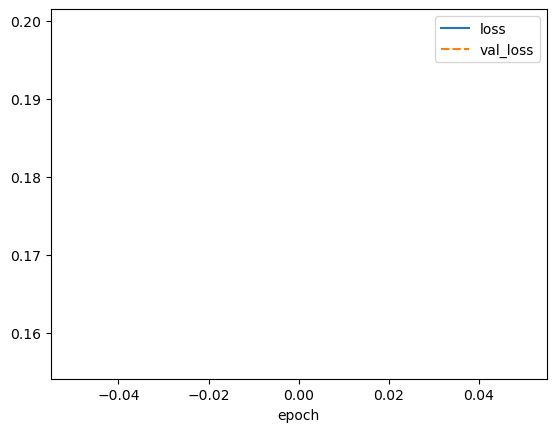

best weights loaded


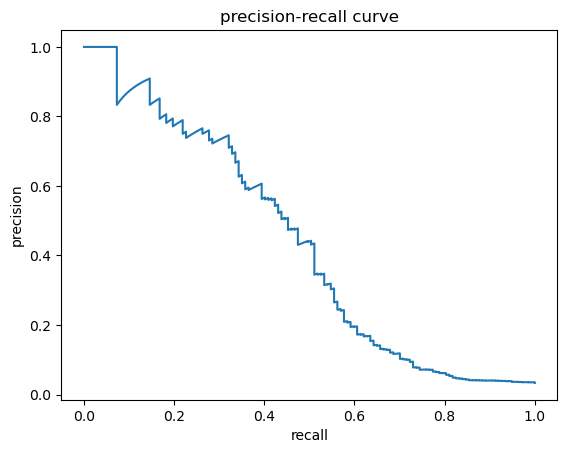

elapsed time: 48.5434148311615
run: 51
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC699C8130>, <torch.utils.data.dataset.Subset object at 0x000001BD0908B040>, <torch.utils.data.dataset.Subset object at 0x000001BD0908B580>]


[21:34:07] WARNING: not removing hydrogen atom without neighbors
[21:34:07] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18129511313004928 | Validation Loss 0.10378026664257049 | Validation accuracy 0.971875


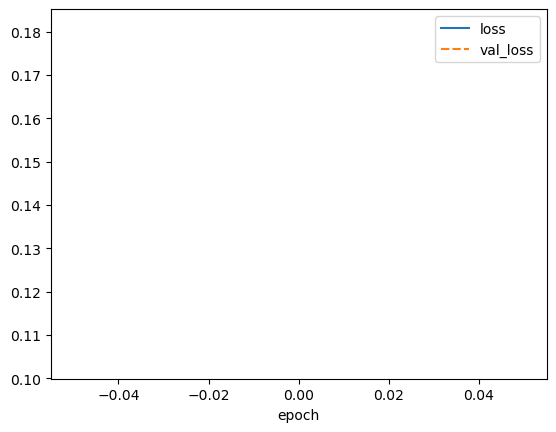

best weights loaded


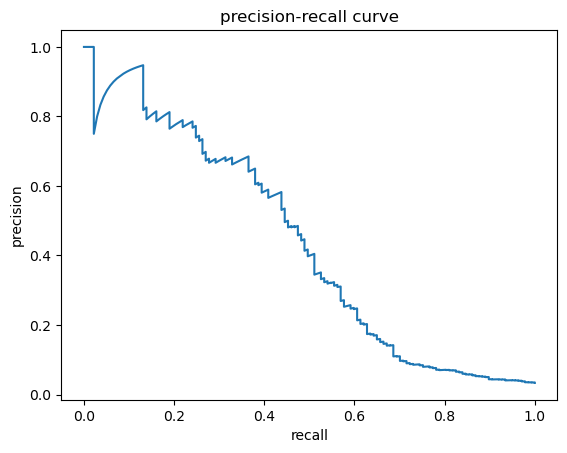

elapsed time: 46.234426498413086
run: 52
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC41614DF0>, <torch.utils.data.dataset.Subset object at 0x000001BC658A4D60>, <torch.utils.data.dataset.Subset object at 0x000001BC658A4790>]


[21:34:54] WARNING: not removing hydrogen atom without neighbors
[21:34:54] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21765168823979117 | Validation Loss 0.1268883004784584 | Validation accuracy 0.971875


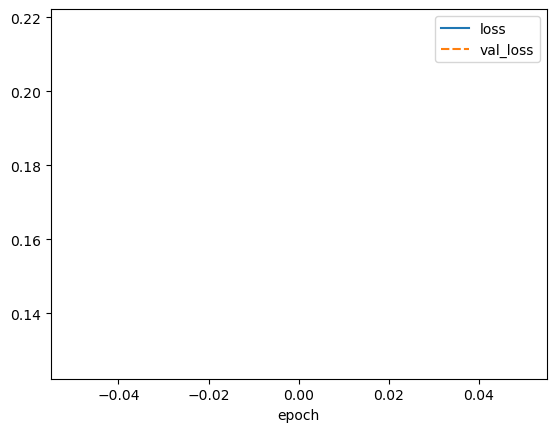

best weights loaded


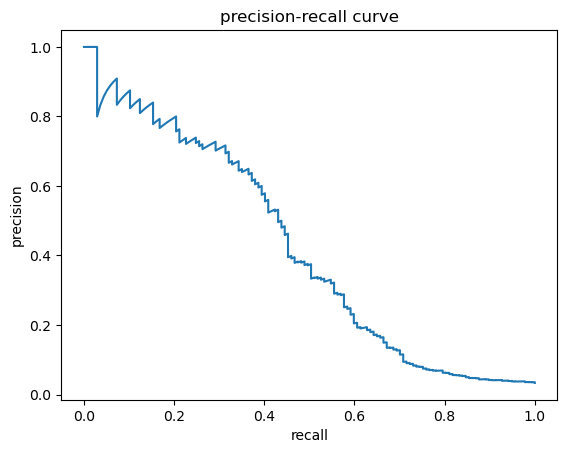

elapsed time: 46.51562762260437
run: 53
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC64503BB0>, <torch.utils.data.dataset.Subset object at 0x000001BD091603A0>, <torch.utils.data.dataset.Subset object at 0x000001BD09160460>]


[21:35:41] WARNING: not removing hydrogen atom without neighbors
[21:35:41] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20468406966238312 | Validation Loss 0.14082224369049073 | Validation accuracy 0.9609592013888889


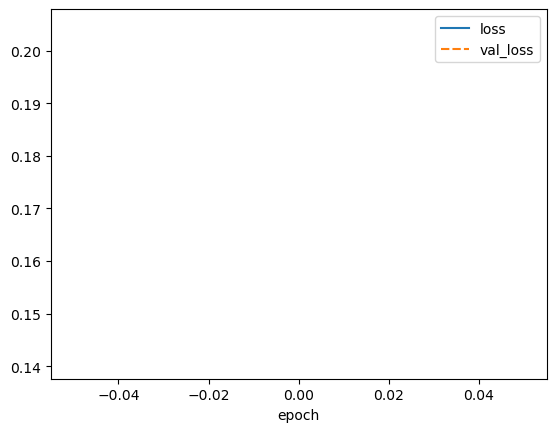

best weights loaded


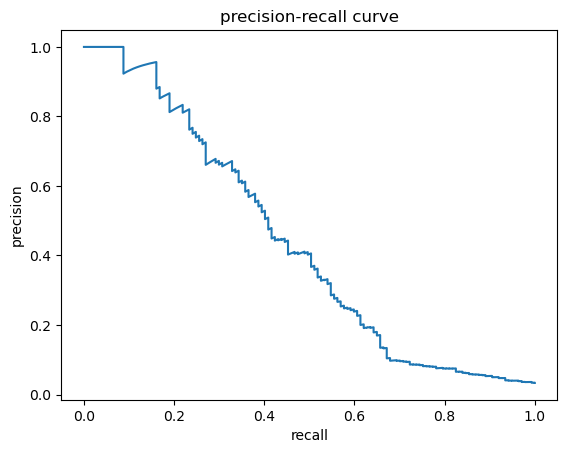

elapsed time: 46.632667541503906
run: 54
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60687370>, <torch.utils.data.dataset.Subset object at 0x000001BD091662E0>, <torch.utils.data.dataset.Subset object at 0x000001BD09166CA0>]


[21:36:27] WARNING: not removing hydrogen atom without neighbors
[21:36:27] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23803170251123834 | Validation Loss 0.21868413388729097 | Validation accuracy 0.9391276041666666


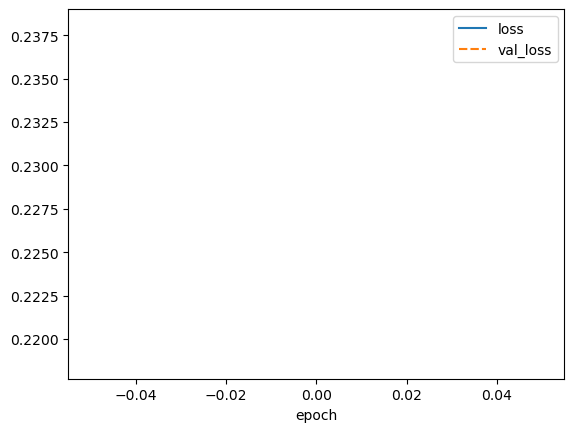

best weights loaded


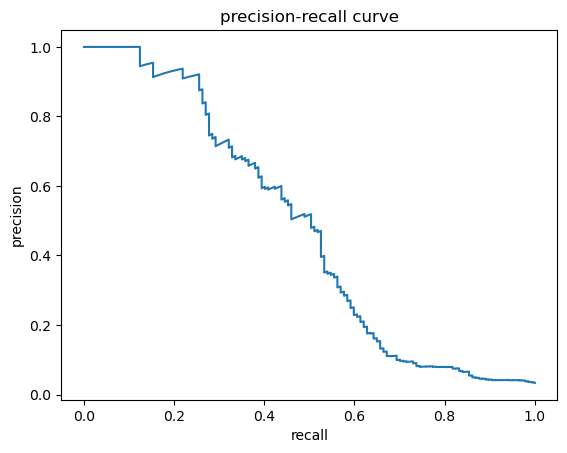

elapsed time: 48.87448501586914
run: 55
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60B3D280>, <torch.utils.data.dataset.Subset object at 0x000001BC658A4BE0>, <torch.utils.data.dataset.Subset object at 0x000001BC658A4040>]


[21:37:15] WARNING: not removing hydrogen atom without neighbors
[21:37:15] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23056493744705664 | Validation Loss 0.1534159690141678 | Validation accuracy 0.971875


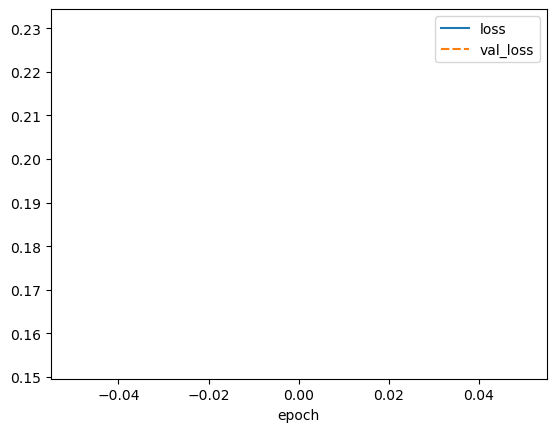

best weights loaded


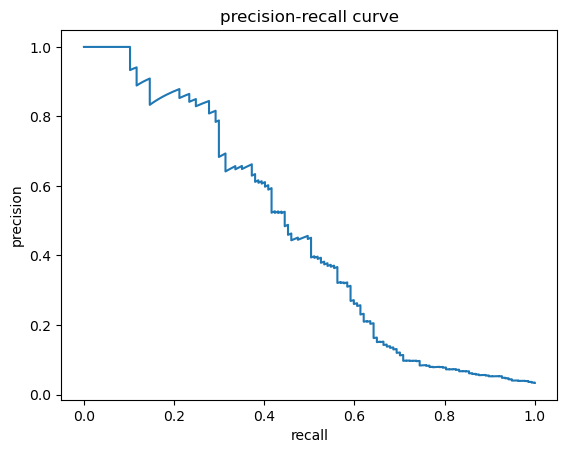

elapsed time: 50.81121492385864
run: 56
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6592AEB0>, <torch.utils.data.dataset.Subset object at 0x000001BD02CA0940>, <torch.utils.data.dataset.Subset object at 0x000001BD02CA0E50>]


[21:38:08] WARNING: not removing hydrogen atom without neighbors
[21:38:08] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21106793528253381 | Validation Loss 0.16369882524013518 | Validation accuracy 0.961740451388889


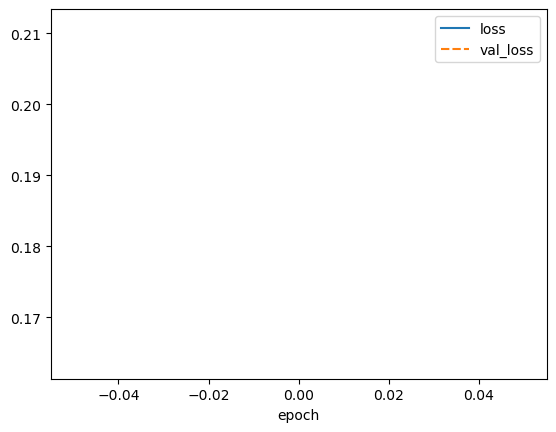

best weights loaded


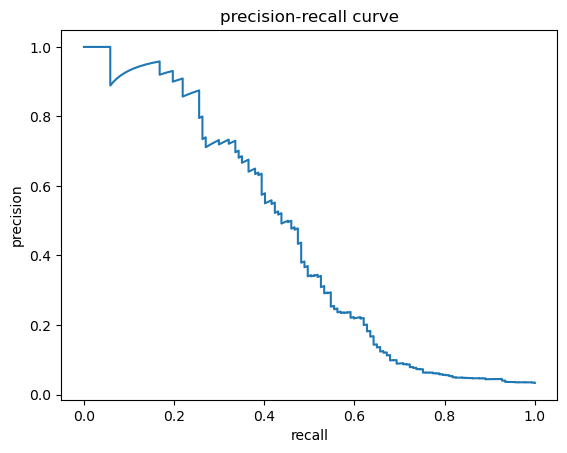

elapsed time: 48.785929441452026
run: 57
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC3CE707C0>, <torch.utils.data.dataset.Subset object at 0x000001BD032811F0>, <torch.utils.data.dataset.Subset object at 0x000001BD03281760>]


[21:38:56] WARNING: not removing hydrogen atom without neighbors
[21:38:56] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21351485044667215 | Validation Loss 0.16840215027332306 | Validation accuracy 0.9609592013888889


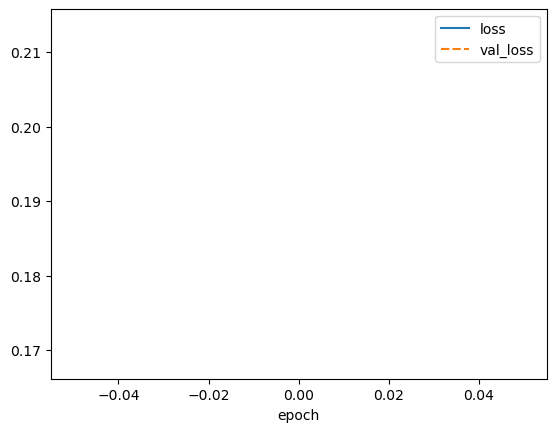

best weights loaded


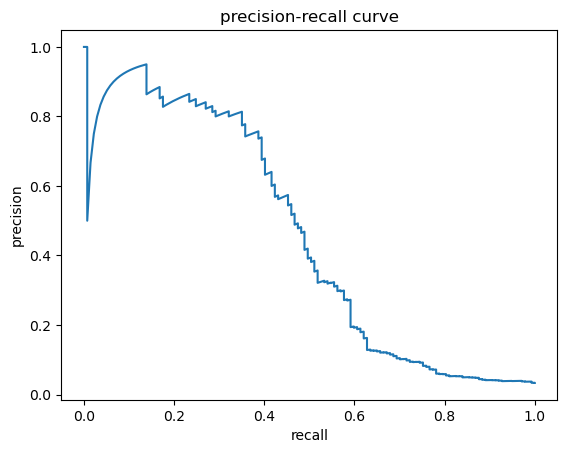

elapsed time: 50.95137596130371
run: 58
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC695E41F0>, <torch.utils.data.dataset.Subset object at 0x000001BC035D6400>, <torch.utils.data.dataset.Subset object at 0x000001BC035D6CD0>]


[21:39:48] WARNING: not removing hydrogen atom without neighbors
[21:39:48] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1919164607922236 | Validation Loss 0.11783631294965743 | Validation accuracy 0.971875


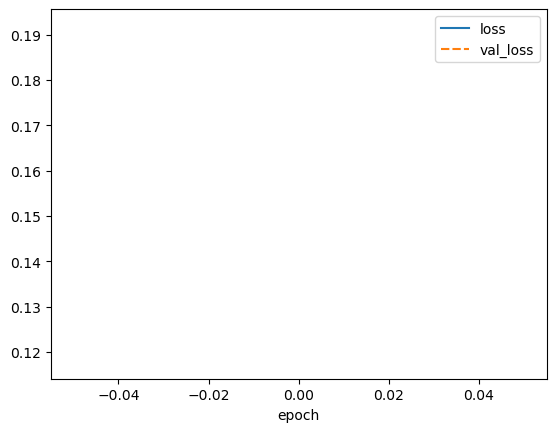

best weights loaded


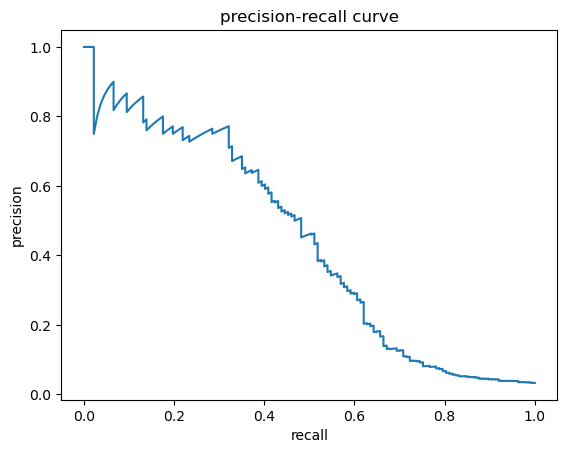

elapsed time: 51.761451959609985
run: 59
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6C7D2190>, <torch.utils.data.dataset.Subset object at 0x000001BC035CB640>, <torch.utils.data.dataset.Subset object at 0x000001BC035CBB50>]


[21:40:40] WARNING: not removing hydrogen atom without neighbors
[21:40:40] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1898750400904453 | Validation Loss 0.10456502810120583 | Validation accuracy 0.971875


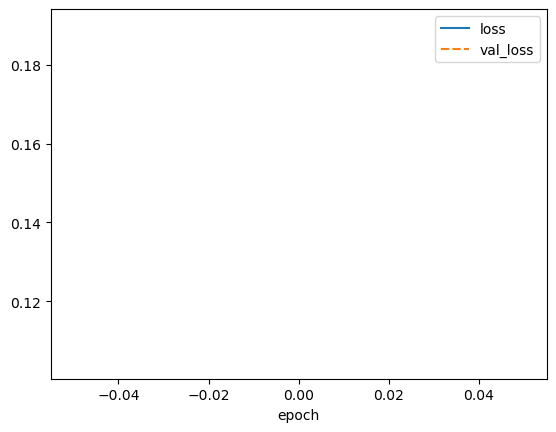

best weights loaded


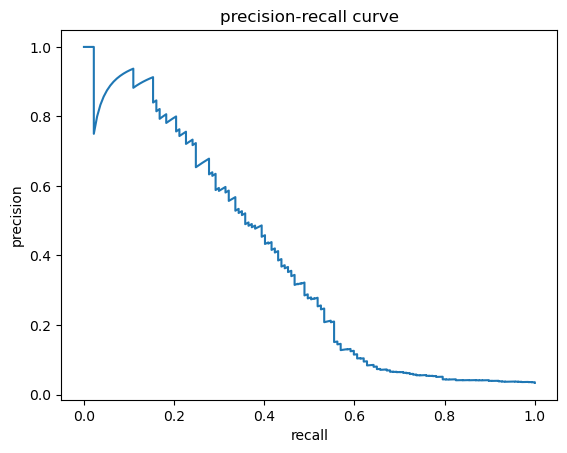

elapsed time: 49.77216362953186
run: 60
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC5DF4B760>, <torch.utils.data.dataset.Subset object at 0x000001BC7CE24430>, <torch.utils.data.dataset.Subset object at 0x000001BC7CE24A30>]


[21:41:30] WARNING: not removing hydrogen atom without neighbors
[21:41:30] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20622684016372217 | Validation Loss 0.1234161265194416 | Validation accuracy 0.971875


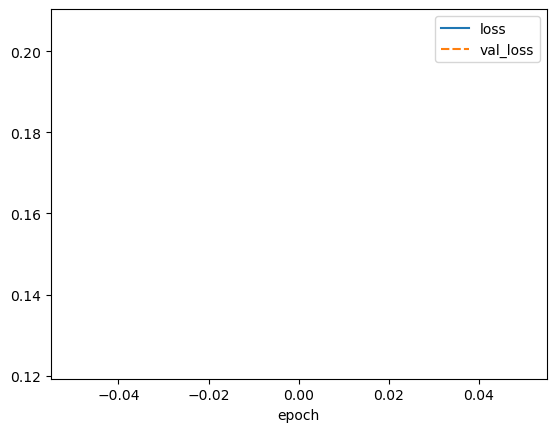

best weights loaded


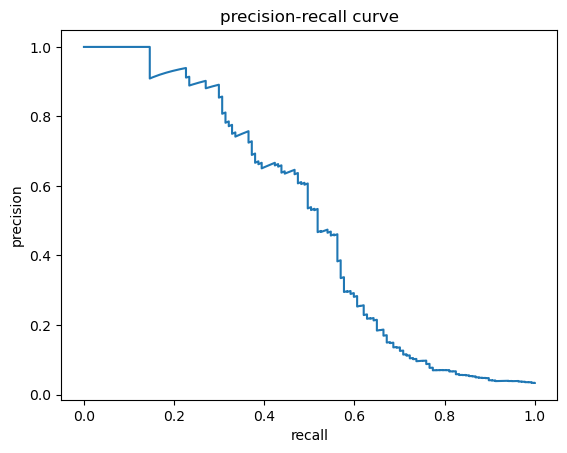

elapsed time: 49.093618869781494
run: 61
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC63D434C0>, <torch.utils.data.dataset.Subset object at 0x000001BC658A4490>, <torch.utils.data.dataset.Subset object at 0x000001BC7CE24550>]


[21:42:18] WARNING: not removing hydrogen atom without neighbors
[21:42:18] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20540337828975735 | Validation Loss 0.11373433694243432 | Validation accuracy 0.971875


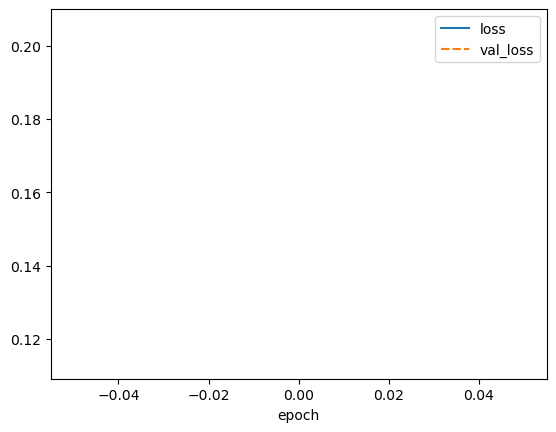

best weights loaded


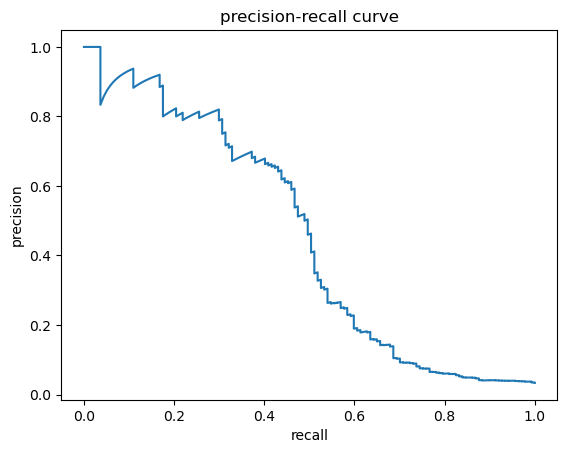

elapsed time: 48.643683433532715
run: 62
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC65F7CBB0>, <torch.utils.data.dataset.Subset object at 0x000001BD0328DB50>, <torch.utils.data.dataset.Subset object at 0x000001BD0325D0D0>]


[21:43:07] WARNING: not removing hydrogen atom without neighbors
[21:43:07] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22463154567010474 | Validation Loss 0.21387047618627547 | Validation accuracy 0.9393229166666666


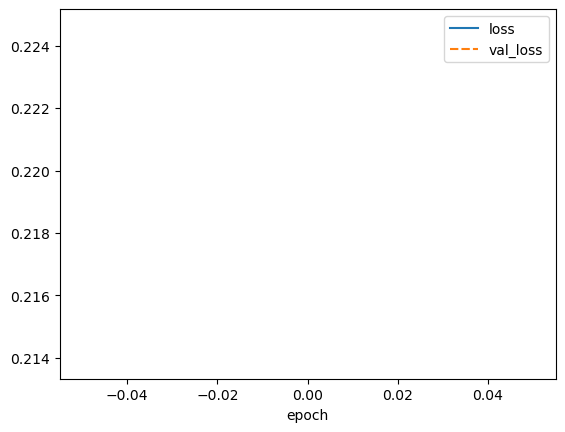

best weights loaded


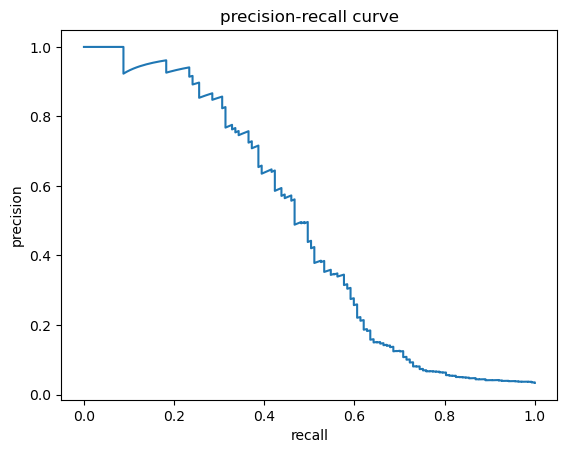

elapsed time: 49.496644496917725
run: 63
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC3CE707C0>, <torch.utils.data.dataset.Subset object at 0x000001BD0325DD60>, <torch.utils.data.dataset.Subset object at 0x000001BCEF67A2E0>]


[21:43:56] WARNING: not removing hydrogen atom without neighbors
[21:43:56] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22525028748945755 | Validation Loss 0.1786115974187851 | Validation accuracy 0.9609592013888889


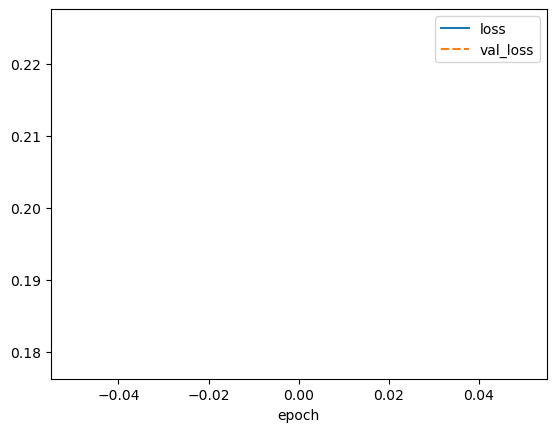

best weights loaded


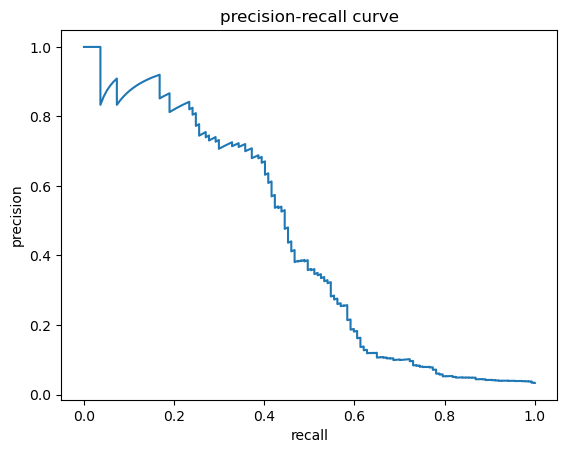

elapsed time: 52.3680055141449
run: 64
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC66245EB0>, <torch.utils.data.dataset.Subset object at 0x000001BD091F5220>, <torch.utils.data.dataset.Subset object at 0x000001BD091F5760>]


[21:44:52] WARNING: not removing hydrogen atom without neighbors
[21:44:52] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21314215660095215 | Validation Loss 0.1252066172659397 | Validation accuracy 0.9724609375


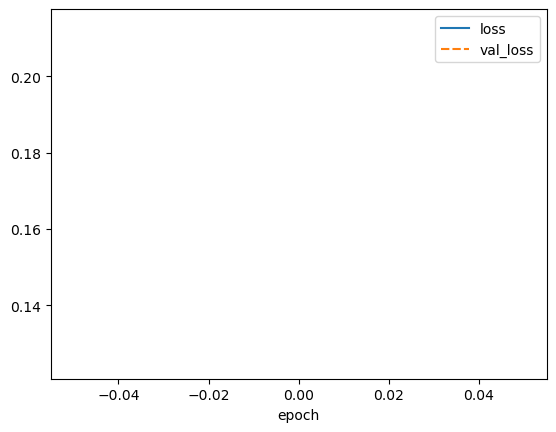

best weights loaded


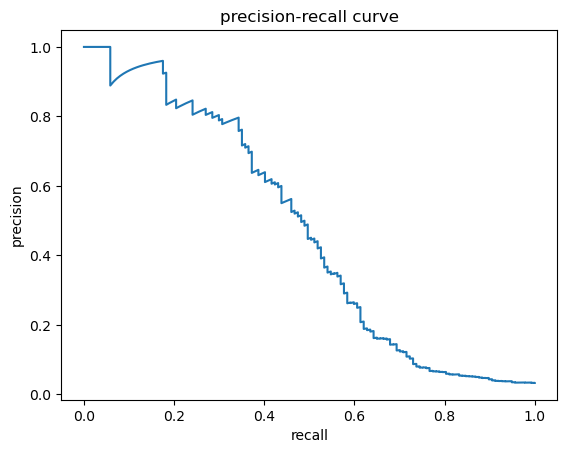

elapsed time: 55.818387269973755
run: 65
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60B10C10>, <torch.utils.data.dataset.Subset object at 0x000001BD0912B850>, <torch.utils.data.dataset.Subset object at 0x000001BD0912BD90>]


[21:45:48] WARNING: not removing hydrogen atom without neighbors
[21:45:48] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2007915905930779 | Validation Loss 0.11834623552858829 | Validation accuracy 0.971875


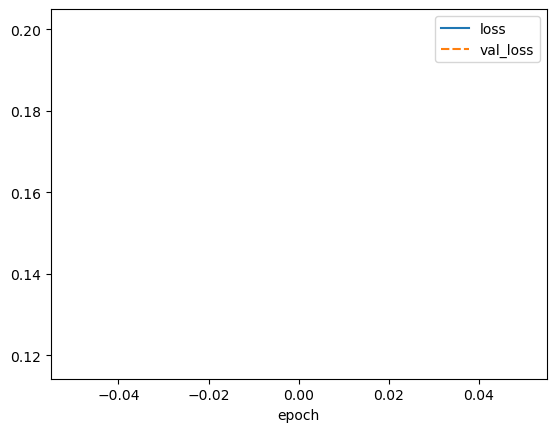

best weights loaded


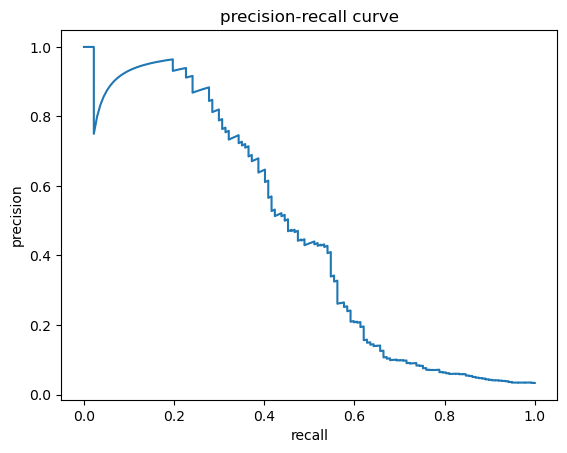

elapsed time: 56.96891808509827
run: 66
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC5DF4B760>, <torch.utils.data.dataset.Subset object at 0x000001BD06A18E50>, <torch.utils.data.dataset.Subset object at 0x000001BD06A18100>]


[21:46:46] WARNING: not removing hydrogen atom without neighbors
[21:46:46] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18524786671905807 | Validation Loss 0.18475171327590942 | Validation accuracy 0.9500434027777779


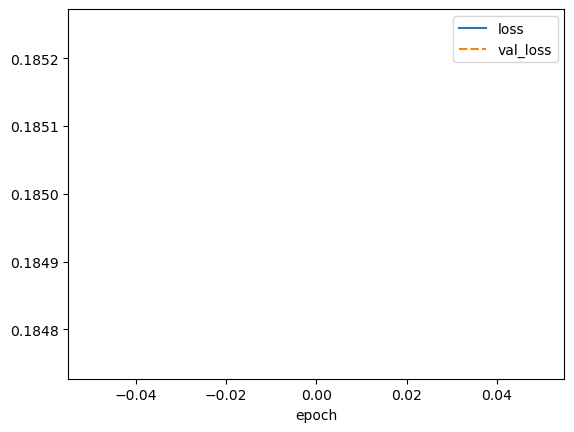

best weights loaded


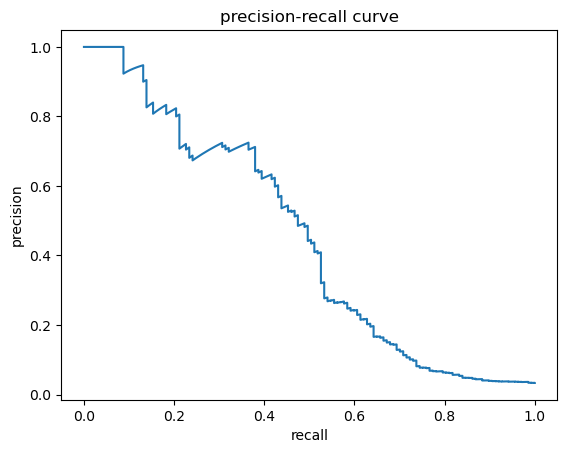

elapsed time: 59.25150156021118
run: 67
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6647BA00>, <torch.utils.data.dataset.Subset object at 0x000001BC018BAA30>, <torch.utils.data.dataset.Subset object at 0x000001BC018BAF40>]


[21:47:43] WARNING: not removing hydrogen atom without neighbors
[21:47:43] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19746831420696143 | Validation Loss 0.10905240476131439 | Validation accuracy 0.971875


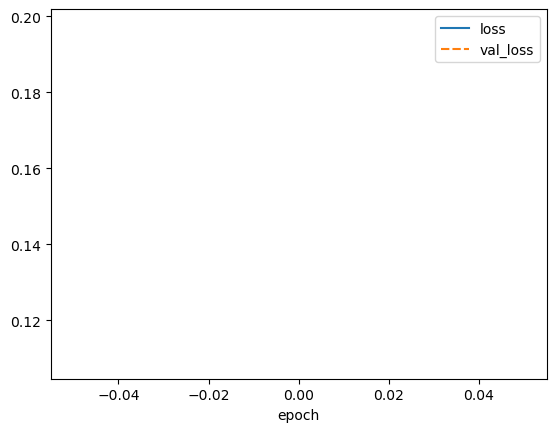

best weights loaded


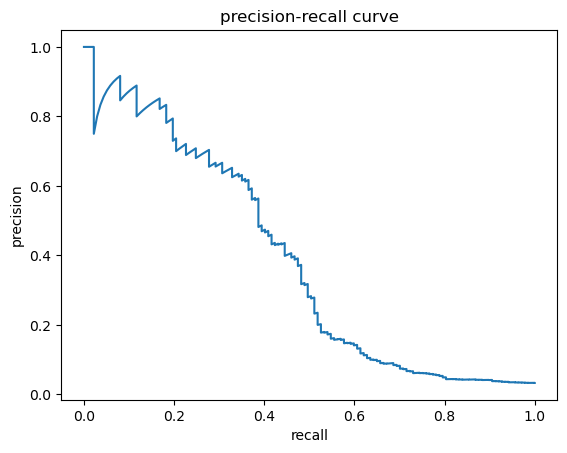

elapsed time: 55.32103157043457
run: 68
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC6D124BE0>, <torch.utils.data.dataset.Subset object at 0x000001BD034615B0>, <torch.utils.data.dataset.Subset object at 0x000001BD03461AF0>]


[21:48:40] WARNING: not removing hydrogen atom without neighbors
[21:48:40] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20808802432183063 | Validation Loss 0.12531821727752684 | Validation accuracy 0.9609592013888889


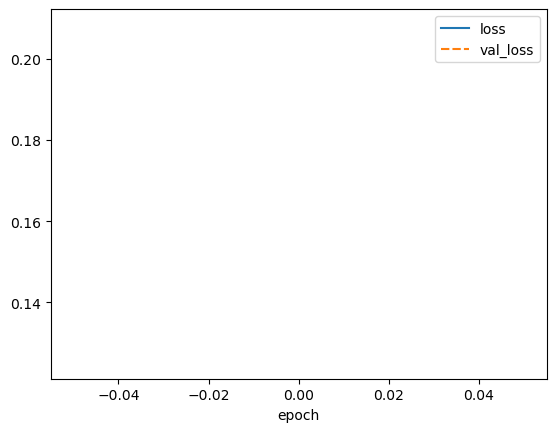

best weights loaded


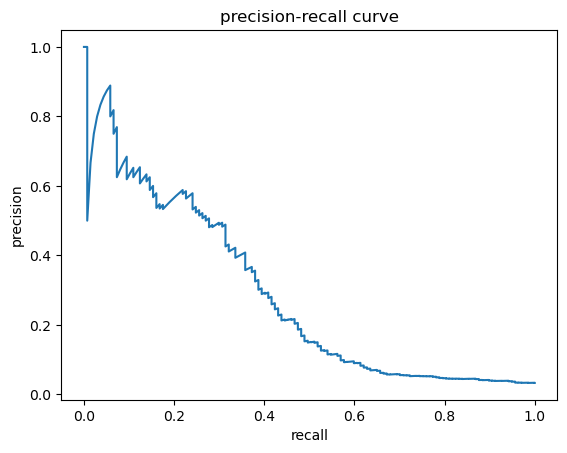

elapsed time: 53.550867557525635
run: 69
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC60B10C10>, <torch.utils.data.dataset.Subset object at 0x000001BC629228B0>, <torch.utils.data.dataset.Subset object at 0x000001BC629225B0>]


[21:49:34] WARNING: not removing hydrogen atom without neighbors
[21:49:34] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21423953184575745 | Validation Loss 0.13764889687299728 | Validation accuracy 0.9609592013888889


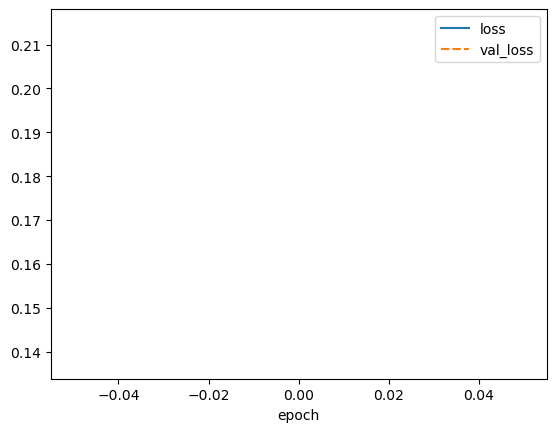

best weights loaded


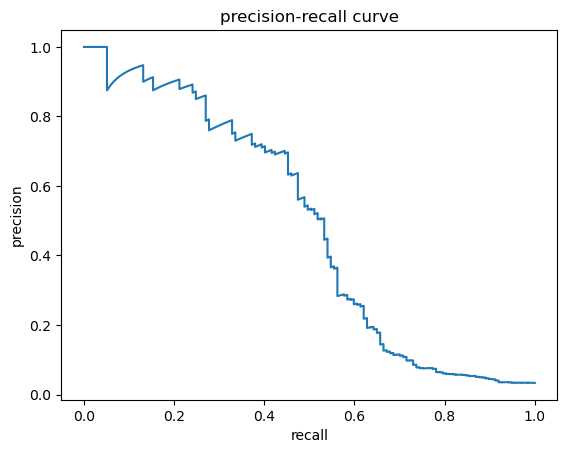

elapsed time: 54.12109041213989
run: 70
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC664DCCD0>, <torch.utils.data.dataset.Subset object at 0x000001BCF6297970>, <torch.utils.data.dataset.Subset object at 0x000001BCF6297E80>]


[21:50:27] WARNING: not removing hydrogen atom without neighbors
[21:50:27] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2115043724576632 | Validation Loss 0.20718182623386383 | Validation accuracy 0.9514105902777779


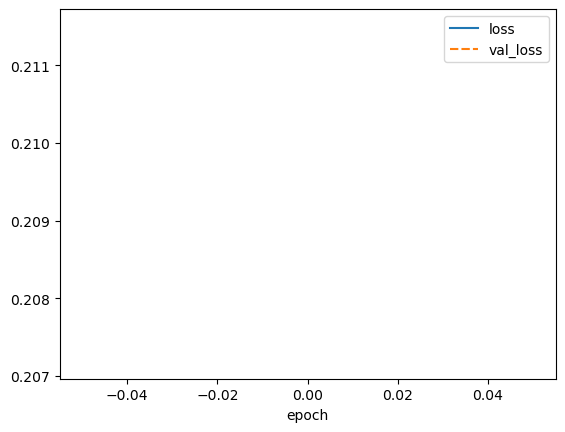

best weights loaded


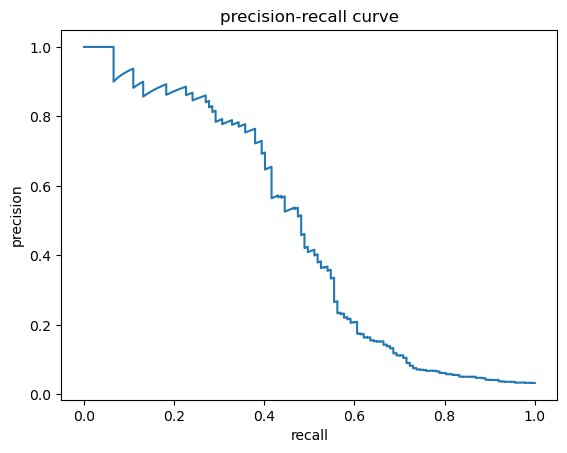

elapsed time: 53.66503024101257
run: 71
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001BC41614D00>, <torch.utils.data.dataset.Subset object at 0x000001BD069079D0>, <torch.utils.data.dataset.Subset object at 0x000001BD06907970>]


[21:51:17] WARNING: not removing hydrogen atom without neighbors
[21:51:17] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2113317736622059 | Validation Loss 0.12790390998125076 | Validation accuracy 0.971875


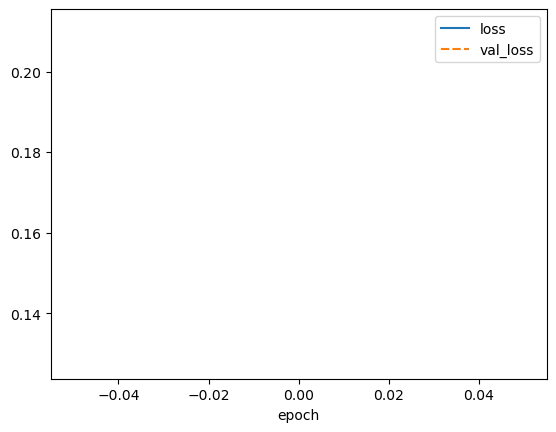

best weights loaded


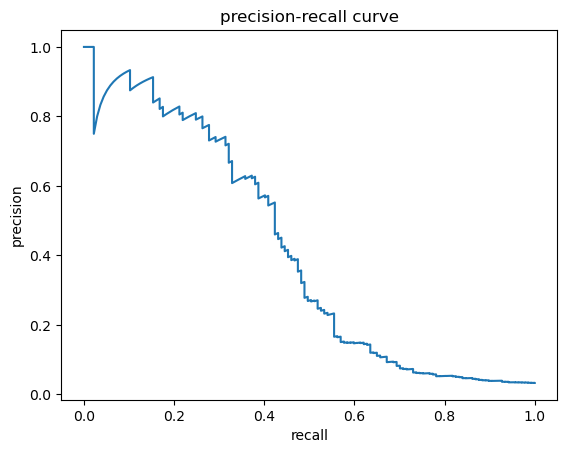

elapsed time: 48.06411385536194


In [12]:
import time
counter = 0
for combination in combinations:
    print(f"run: {counter}")
    t0 = time.time()
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_classification_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_classification_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification_fingerprint(model, test_loader, device, best_model_weights)

    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")

    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    save_dict["batch_size"] = batch_size

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    